# Amazon Sales Data Analysis

## Import Python Libraries

In [1214]:
# Import Python Library

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

## Import Data Sets

In [546]:
amazon = pd.read_csv('https://raw.githubusercontent.com/Shoaib3786/DataAnalytics--Amazon_Sales_Analysis/main/Dataset/Sales_data_csv.csv')

## Data Struture Analysis

In [548]:
amazon.head(2)

CustKey     DateKey  Discount Amount Invoice Date  Invoice Number  \
0  10000481  30-04-2017          -237.91   30-04-2017          100012   
1  10002220  14-07-2017           368.79   14-07-2017          100233   

  Item Class Item Number                Item  Line Number  List Price  ...  \
0        NaN         NaN    Urban Large Eggs         2000        0.00  ...   
1        P01       20910  Moms Sliced Turkey         1000      824.96  ...   

   Promised Delivery Date Sales Amount  Sales Amount Based on List Price  \
0              30-04-2017       237.91                              0.00   
1              14-07-2017       456.17                            824.96   

   Sales Cost Amount  Sales Margin Amount  Sales Price  Sales Quantity  \
0                0.0               237.91       237.91               1   
1                0.0               456.17       456.17               1   

   Sales Rep  U/M Region  
0        184   EA  East   
1        127   EA  East   

[2 rows x 21 columns]

In [549]:
amazon.shape

(65282, 21)

In [550]:
amazon.columns

Index(['CustKey', 'DateKey', 'Discount Amount', 'Invoice Date',
       'Invoice Number', 'Item Class', 'Item Number', 'Item', 'Line Number',
       'List Price', 'Order Number', 'Promised Delivery Date', 'Sales Amount',
       'Sales Amount Based on List Price', 'Sales Cost Amount',
       'Sales Margin Amount', 'Sales Price', 'Sales Quantity', 'Sales Rep',
       'U/M', 'Region'],
      dtype='object')

## Identifying Missing Values

In [552]:
amazon.isnull().sum()

CustKey                                0
DateKey                                0
Discount Amount                        2
Invoice Date                           0
Invoice Number                         0
Item Class                          8289
Item Number                           41
Item                                   0
Line Number                            0
List Price                             0
Order Number                           0
Promised Delivery Date                 0
Sales Amount                           0
Sales Amount Based on List Price       0
Sales Cost Amount                      0
Sales Margin Amount                    0
Sales Price                            1
Sales Quantity                         0
Sales Rep                              0
U/M                                    0
Region                                 0
dtype: int64

## Handelling Missing Values

In [554]:
pd.options.mode.copy_on_write = True

In [555]:
import warnings
warnings.filterwarnings("ignore")

In [556]:
amazon['Discount Amount'].fillna(value=amazon['Discount Amount'].mean(),inplace=True)

In [557]:
amazon['Sales Price'].fillna(value=amazon['Sales Price'].mean(),inplace=True)

In [558]:
amazon.dropna(subset='Item Number',inplace=True)

## Data Cleaning Process

In [560]:
amazon['Item Class'].replace({'PO1':'PQ1'},inplace=True)

In [561]:
amazon['Item Class'].fillna(value='PM1',inplace=True)

In [562]:
amazon.drop(columns='Item Class',inplace=True)

## Descriptive Stastistics

In [564]:
amazon.info()

<class 'pandas.core.frame.DataFrame'>
Index: 65241 entries, 1 to 65281
Data columns (total 20 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   CustKey                           65241 non-null  int64  
 1   DateKey                           65241 non-null  object 
 2   Discount Amount                   65241 non-null  float64
 3   Invoice Date                      65241 non-null  object 
 4   Invoice Number                    65241 non-null  int64  
 5   Item Number                       65241 non-null  object 
 6   Item                              65241 non-null  object 
 7   Line Number                       65241 non-null  int64  
 8   List Price                        65241 non-null  float64
 9   Order Number                      65241 non-null  int64  
 10  Promised Delivery Date            65241 non-null  object 
 11  Sales Amount                      65241 non-null  float64
 12  Sales Amo

In [565]:
amazon.describe()

CustKey  Discount Amount  Invoice Number    Line Number  \
count  6.524100e+04     65241.000000    65241.000000   65241.000000   
mean   1.001770e+07      1857.310923   216292.785242   23725.043178   
std    7.175846e+03      9039.535784    94982.018695   32669.565014   
min    1.000045e+07   -255820.800000   100034.000000    1000.000000   
25%    1.001272e+07       246.280000   117969.000000    3000.000000   
50%    1.001966e+07       442.200000   222904.000000   12000.000000   
75%    1.002351e+07      1001.500000   314325.000000   32000.000000   
max    1.002758e+07    343532.660000   332842.000000  344000.000000   

         List Price   Order Number   Sales Amount  \
count  65241.000000   65241.000000   65241.000000   
mean     515.016834  180567.610122    2853.121051   
std      449.144896   67612.238675   15169.020896   
min        0.000000  100838.000000     200.010000   
25%      181.560000  115281.000000     308.310000   
50%      325.190000  203695.000000     553.940000   
75%      803.860000  218576.000000    1279.750000   
max     2760.700000  321532.000000  555376.000000   

       Sales Amount Based on List Price  Sales Cost Amount  \
count                      65241.000000       65241.000000   
mean                        4710.431974        1662.023052   
std                        20702.609533        9559.396917   
min                            0.000000           0.000000   
25%                          561.040000         167.810000   
50%                          999.750000         304.580000   
75%                         2321.400000         688.550000   
max                       632610.160000      366576.000000   

       Sales Margin Amount   Sales Price  Sales Quantity     Sales Rep  
count         65241.000000  65241.000000    65241.000000  65241.000000  
mean           1191.097999    283.250283       45.106712    137.421422  
std            5862.566647    250.448615      429.793733     26.644271  
min           -3932.930000      0.337341        1.000000    103.000000  
25%             129.890000    100.030000        2.000000    113.000000  
50%             246.480000    183.282857        3.000000    134.000000  
75%             578.220000    448.220000        8.000000    160.000000  
max          188800.000000   6035.000000    16000.000000    185.000000

##### Descriptive statistics are essential for understanding the basic features of a dataset, simplifying complex data, and providing a foundation for further statistical analysis and interpretation

## amazon_2 Dataframe

In [567]:
amazon_2 = amazon.copy()

In [568]:
amazon_2.drop(columns='DateKey',inplace=True)

In [569]:
amazon_2.drop(columns='Order Number',inplace=True)

In [570]:
amazon_2.drop(columns='U/M',inplace=True)

In [571]:
amazon_2.head(2)

CustKey  Discount Amount Invoice Date  Invoice Number Item Number  \
1  10002220           368.79   14-07-2017          100233       20910   
2  10002220           109.73   17-10-2017          116165       38076   

                              Item  Line Number  List Price  \
1               Moms Sliced Turkey         1000      824.96   
2  Cutting Edge Foot-Long Hot Dogs         1000      548.66   

  Promised Delivery Date  Sales Amount  Sales Amount Based on List Price  \
1             14-07-2017        456.17                            824.96   
2             16-10-2017        438.93                            548.66   

   Sales Cost Amount  Sales Margin Amount  Sales Price  Sales Quantity  \
1                0.0               456.17       456.17               1   
2                0.0               438.93       438.93               1   

   Sales Rep Region  
1        127  East   
2        127  East

## Categorical Data Analysis

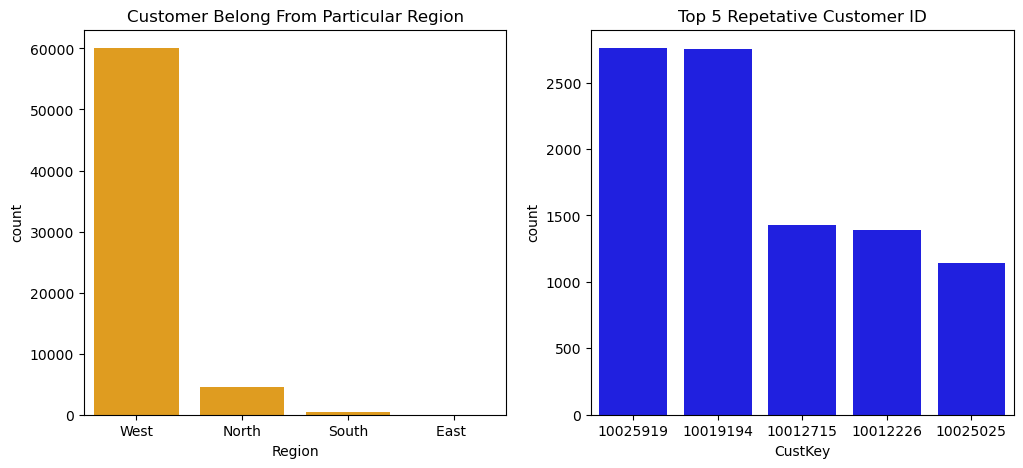

In [708]:
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.countplot(data=amazon_2,x=amazon_2['Region'],order=amazon_2['Region'].value_counts().index,color='orange')
plt.title('Customer Belong From Particular Region')
plt.subplot(1,2,2)
sns.countplot(data=amazon_2,x=amazon_2['CustKey'],order=amazon_2['CustKey'].value_counts().head(5).index,color='blue')
plt.title('Top 5 Repetative Customer ID')
plt.show()

Text(0.5, 1.0, 'Top 5 Product Contribution')

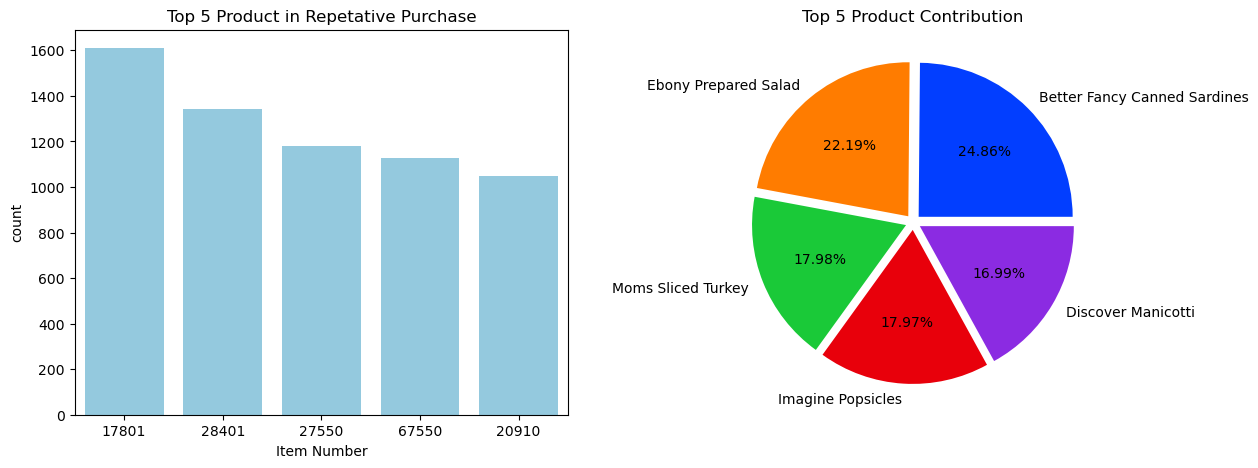

In [714]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.countplot(data=amazon_2,x=amazon_2['Item Number'],order=amazon_2['Item Number'].value_counts().head().index,color='skyblue')
plt.title('Top 5 Product in Repetative Purchase')
plt.subplot(1,2,2)
plt.pie(x=amazon_2['Item'].value_counts().head(),autopct='%1.2f%%',labels=amazon_2['Item'].value_counts().head().index,explode=len(amazon_2['Item'].value_counts().head())*[0.05],colors=sns.color_palette('bright'))
plt.title('Top 5 Product Contribution')

## amazon_3 Dataframe

In [716]:
amazon_3 = amazon_2[['CustKey','Invoice Date','Invoice Number','Item Number','Item','Region','Sales Rep','Line Number', 'Promised Delivery Date','List Price','Sales Quantity','Sales Amount Based on List Price','Sales Price','Sales Amount','Discount Amount','Sales Cost Amount','Sales Margin Amount']]

In [718]:
amazon_3.head(2)

CustKey Invoice Date  Invoice Number Item Number  \
1  10002220   14-07-2017          100233       20910   
2  10002220   17-10-2017          116165       38076   

                              Item Region  Sales Rep  Line Number  \
1               Moms Sliced Turkey  East         127         1000   
2  Cutting Edge Foot-Long Hot Dogs  East         127         1000   

  Promised Delivery Date  List Price  Sales Quantity  \
1             14-07-2017      824.96               1   
2             16-10-2017      548.66               1   

   Sales Amount Based on List Price  Sales Price  Sales Amount  \
1                            824.96       456.17        456.17   
2                            548.66       438.93        438.93   

   Discount Amount  Sales Cost Amount  Sales Margin Amount  
1           368.79                0.0               456.17  
2           109.73                0.0               438.93

## Used Date Time Function

In [720]:
import datetime

In [722]:
amazon_3['Invoice Date'] = pd.to_datetime(amazon_3['Invoice Date'],dayfirst=True)

In [724]:
amazon_3['Invoice Year'] = amazon_3['Invoice Date'].dt.year

In [726]:
amazon_3['Invoice Month'] = amazon_3['Invoice Date'].dt.month

In [728]:
amazon_3['Promised Delivery Date'] = pd.to_datetime(amazon_3['Promised Delivery Date'],dayfirst=True)

In [730]:
amazon_3['Delivery Year'] = amazon_3['Promised Delivery Date'].dt.year

## amazon_4 Dataframe

In [732]:
amazon_4 = amazon_3[['CustKey','Invoice Date','Invoice Year','Invoice Month','Invoice Number','Item Number','Item','Region','Sales Rep','Line Number','Promised Delivery Date','Delivery Year','List Price','Sales Quantity','Sales Amount Based on List Price','Sales Price','Sales Amount','Discount Amount','Sales Cost Amount','Sales Margin Amount']]

In [734]:
amazon_4['List Price'] = amazon_4['List Price'].round(2)

In [736]:
amazon_4['Sales Amount Based on List Price'] = amazon_4['Sales Amount Based on List Price'].round(2)

In [738]:
amazon_4['Sales Price'] = amazon_4['Sales Price'].round(2)

In [740]:
amazon_4['Sales Amount'] = amazon_4['Sales Amount'].round(2)

In [742]:
amazon_4['Discount Amount'] = amazon_4['Discount Amount'].round(2)

In [744]:
amazon_4['Sales Cost Amount'] = amazon_4['Sales Cost Amount'].round(2)

In [746]:
amazon_4['Sales Cost Amount'] = amazon_4['Sales Cost Amount'].round(2)

## amazon_5 Dataframe

In [748]:
amazon_5 = amazon_4.copy()

In [750]:
wrong_delivery_year = amazon_5[(amazon_5['Delivery Year'] == 2009) | (amazon_5['Delivery Year'] == 2010) | (amazon_5['Delivery Year'] == 2008)]

In [752]:
amazon_5.insert(loc=4,column='Short Date',value=amazon_5['Invoice Year'].astype(str) + '-' + amazon_5['Invoice Month'].astype(str))

In [754]:
amazon_5.head(2)

CustKey Invoice Date  Invoice Year  Invoice Month Short Date  \
1  10002220   2017-07-14          2017              7     2017-7   
2  10002220   2017-10-17          2017             10    2017-10   

   Invoice Number Item Number                             Item Region  \
1          100233       20910               Moms Sliced Turkey  East    
2          116165       38076  Cutting Edge Foot-Long Hot Dogs  East    

   Sales Rep  ...  Promised Delivery Date Delivery Year  List Price  \
1        127  ...              2017-07-14          2017      824.96   
2        127  ...              2017-10-16          2017      548.66   

   Sales Quantity  Sales Amount Based on List Price  Sales Price  \
1               1                            824.96       456.17   
2               1                            548.66       438.93   

   Sales Amount  Discount Amount  Sales Cost Amount  Sales Margin Amount  
1        456.17           368.79                0.0               456.17  
2        438.93           109.73                0.0               438.93  

[2 rows x 21 columns]

## amazon_6 Dataframe

In [756]:
amazon_6 = amazon_5[(amazon_5['Delivery Year'] == 2017) | (amazon_5['Delivery Year'] == 2018) | (amazon_5['Delivery Year'] == 2019)]

In [758]:
amazon_6.drop(columns='Invoice Number',inplace=True)

In [760]:
amazon_6.drop(columns='Invoice Month',inplace=True)

In [762]:
amazon_6['TAT'] = (amazon_6['Promised Delivery Date']-amazon_6['Invoice Date'])

In [764]:
amazon_6['Short Date'] = pd.to_datetime(amazon_6['Short Date'])

## Outlier Detecting In Datasets

In [766]:
amazon_6 = amazon_6[amazon_6['Sales Price'] < 4000]

In [768]:
amazon_6.head(2)

CustKey Invoice Date  Invoice Year Short Date Item Number  \
1  10002220   2017-07-14          2017 2017-07-01       20910   
2  10002220   2017-10-17          2017 2017-10-01       38076   

                              Item Region  Sales Rep  Line Number  \
1               Moms Sliced Turkey  East         127         1000   
2  Cutting Edge Foot-Long Hot Dogs  East         127         1000   

  Promised Delivery Date  Delivery Year  List Price  Sales Quantity  \
1             2017-07-14           2017      824.96               1   
2             2017-10-16           2017      548.66               1   

   Sales Amount Based on List Price  Sales Price  Sales Amount  \
1                            824.96       456.17        456.17   
2                            548.66       438.93        438.93   

   Discount Amount  Sales Cost Amount  Sales Margin Amount     TAT  
1           368.79                0.0               456.17  0 days  
2           109.73                0.0               438.93 -1 days

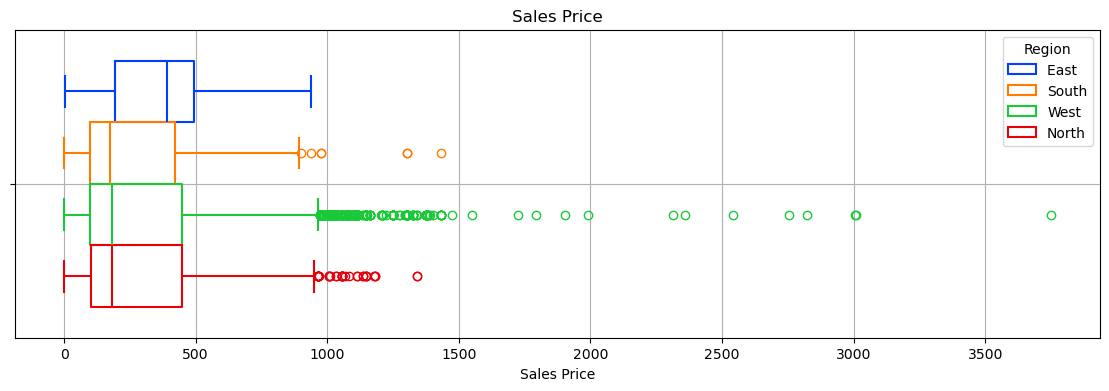

In [774]:
plt.figure(figsize=(14,4))
sns.boxplot(data=amazon_6,x=amazon_6['Sales Price'],color='blue',fill=False,hue=amazon_6['Region'],palette='bright')
plt.title('Sales Price')
plt.grid()
plt.show()

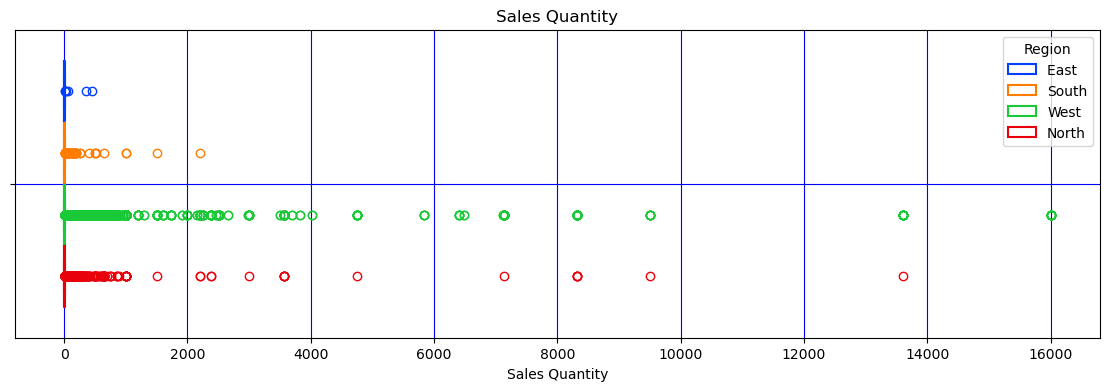

In [778]:
plt.figure(figsize=(14,4))
sns.boxplot(data=amazon_6,x=amazon_6['Sales Quantity'],hue=amazon_6['Region'],palette='bright',fill=False)
plt.title('Sales Quantity')
plt.grid(color='blue')
plt.show()

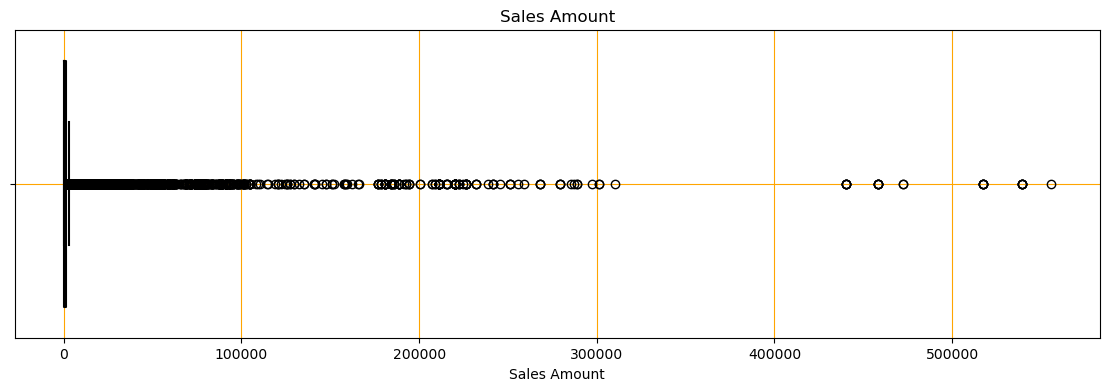

In [790]:
plt.figure(figsize=(14,4))
sns.boxplot(data=amazon_6,x=amazon_6['Sales Amount'],fill=False,color='black')
plt.title('Sales Amount')
plt.grid(color='orange')
plt.show()

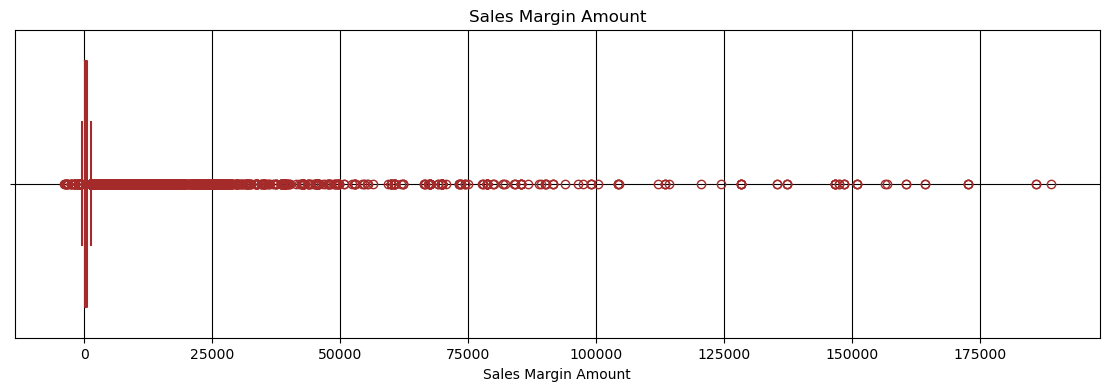

In [798]:
plt.figure(figsize=(14,4))
sns.boxplot(data=amazon_6,x=amazon_6['Sales Margin Amount'],fill=False,color='brown')
plt.title('Sales Margin Amount')
plt.grid(color='black')
plt.show()

## Removing the Outliers

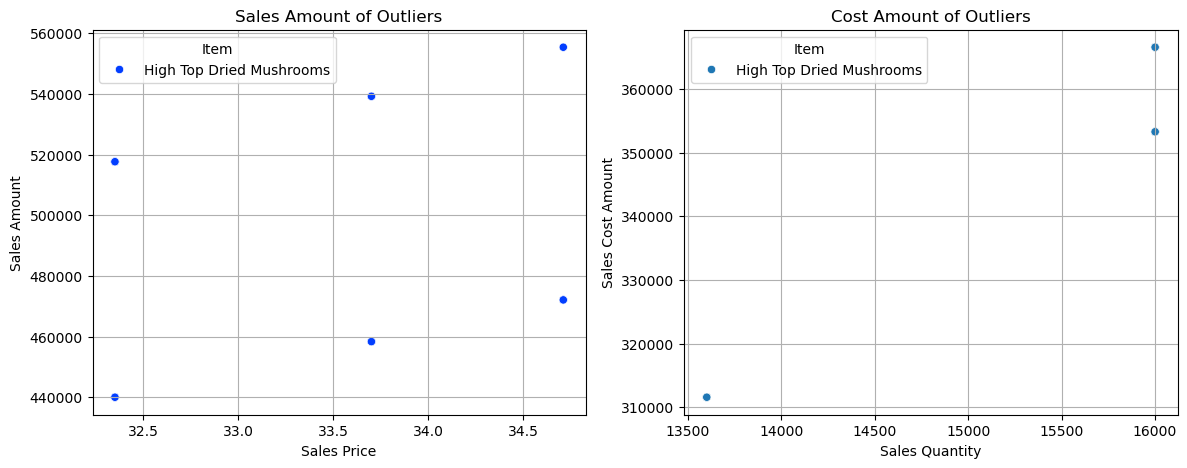

In [806]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=amazon_6[amazon_6['Sales Amount'] > 350000],x=amazon_6[amazon_6['Sales Amount'] > 350000]['Sales Price'],y=amazon_6[amazon_6['Sales Amount'] > 350000]['Sales Amount'],hue='Item',palette='bright')
plt.title('Sales Amount of Outliers')
plt.grid()
plt.subplot(1,2,2)
sns.scatterplot(data=amazon_6[amazon_6['Sales Cost Amount'] > 200000],x=amazon_6[amazon_6['Sales Cost Amount'] > 200000]['Sales Quantity'],y=amazon_6[amazon_6['Sales Cost Amount'] > 200000]['Sales Cost Amount'],hue='Item')
plt.title('Cost Amount of Outliers')
plt.grid()
plt.show()

## Corrected Data Frame amazon_6

In [808]:
# Drop Around 23 Rows of The Outliers
amazon_6 = amazon_6[amazon_6['Sales Amount'] < 350000]

In [810]:
amazon_6.head(2)

CustKey Invoice Date  Invoice Year Short Date Item Number  \
1  10002220   2017-07-14          2017 2017-07-01       20910   
2  10002220   2017-10-17          2017 2017-10-01       38076   

                              Item Region  Sales Rep  Line Number  \
1               Moms Sliced Turkey  East         127         1000   
2  Cutting Edge Foot-Long Hot Dogs  East         127         1000   

  Promised Delivery Date  Delivery Year  List Price  Sales Quantity  \
1             2017-07-14           2017      824.96               1   
2             2017-10-16           2017      548.66               1   

   Sales Amount Based on List Price  Sales Price  Sales Amount  \
1                            824.96       456.17        456.17   
2                            548.66       438.93        438.93   

   Discount Amount  Sales Cost Amount  Sales Margin Amount     TAT  
1           368.79                0.0               456.17  0 days  
2           109.73                0.0               438.93 -1 days

## Building Correlation Between Columns

In [812]:
import plotly.graph_objects as go
import plotly.express as px

In [818]:
correlation = amazon_6[['List Price','Sales Quantity','Sales Amount Based on List Price','Sales Price','Sales Amount','Discount Amount','Sales Cost Amount','Sales Margin Amount']]

In [820]:
correlation.head()

List Price  Sales Quantity  Sales Amount Based on List Price  Sales Price  \
1      824.96               1                            824.96       456.17   
2      548.66               1                            548.66       438.93   
4      408.52             455                         185876.60       196.15   
6      795.31               1                            795.31       424.30   
7      575.00               2                           1150.00       270.96   

   Sales Amount  Discount Amount  Sales Cost Amount  Sales Margin Amount  
1        456.17           368.79                0.0               456.17  
2        438.93           109.73                0.0               438.93  
4      89248.66         96627.94                0.0             89248.66  
6        424.30           371.01                0.0               424.30  
7        541.92           608.08                0.0               541.92

In [822]:
correlation_2 = correlation.corr()

In [826]:
correlation_2

List Price  Sales Quantity  \
List Price                          1.000000       -0.108652   
Sales Quantity                     -0.108652        1.000000   
Sales Amount Based on List Price    0.038469        0.512049   
Sales Price                         0.966479       -0.105279   
Sales Amount                        0.002748        0.707982   
Discount Amount                     0.075123        0.102925   
Sales Cost Amount                  -0.001636        0.756743   
Sales Margin Amount                 0.008827        0.608449   

                                  Sales Amount Based on List Price  \
List Price                                                0.038469   
Sales Quantity                                            0.512049   
Sales Amount Based on List Price                          1.000000   
Sales Price                                               0.024076   
Sales Amount                                              0.909976   
Discount Amount                                           0.832513   
Sales Cost Amount                                         0.894106   
Sales Margin Amount                                       0.893072   

                                  Sales Price  Sales Amount  Discount Amount  \
List Price                           0.966479      0.002748         0.075123   
Sales Quantity                      -0.105279      0.707982         0.102925   
Sales Amount Based on List Price     0.024076      0.909976         0.832513   
Sales Price                          1.000000      0.000528         0.048608   
Sales Amount                         0.000528      1.000000         0.527843   
Discount Amount                      0.048608      0.527843         1.000000   
Sales Cost Amount                   -0.005404      0.987377         0.512201   
Sales Margin Amount                  0.008892      0.974614         0.527135   

                                  Sales Cost Amount  Sales Margin Amount  
List Price                                -0.001636             0.008827  
Sales Quantity                             0.756743             0.608449  
Sales Amount Based on List Price           0.894106             0.893072  
Sales Price                               -0.005404             0.008892  
Sales Amount                               0.987377             0.974614  
Discount Amount                            0.512201             0.527135  
Sales Cost Amount                          1.000000             0.926850  
Sales Margin Amount                        0.926850             1.000000

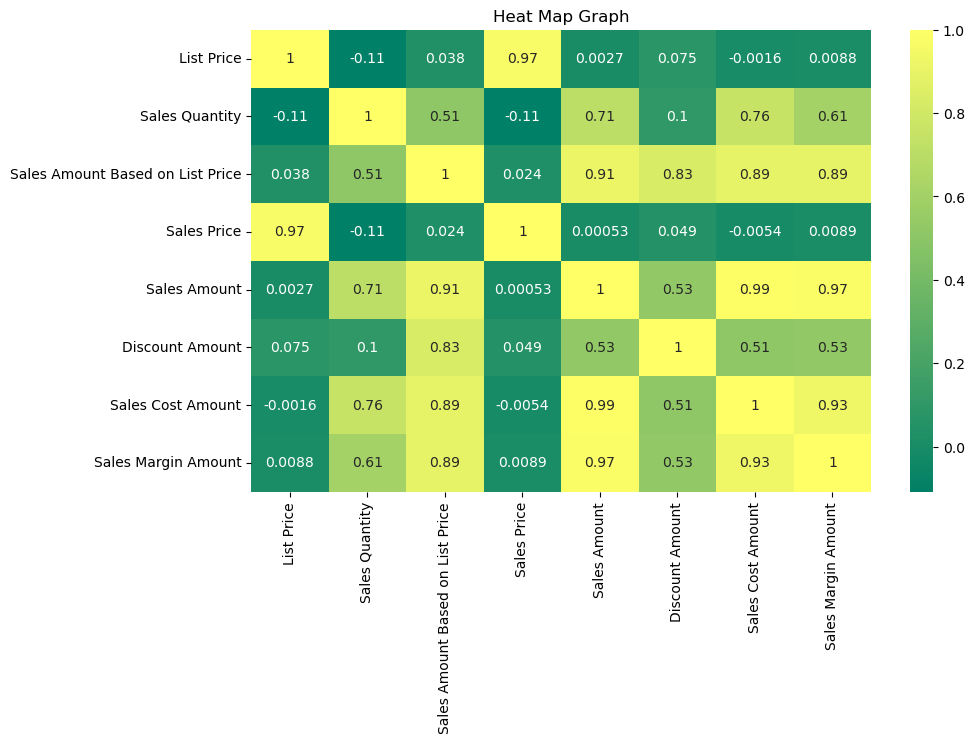

In [832]:
plt.figure(figsize=(10,6))
sns.heatmap(data=correlation_2,annot=True,cmap='summer')
plt.title('Heat Map Graph')
plt.show()

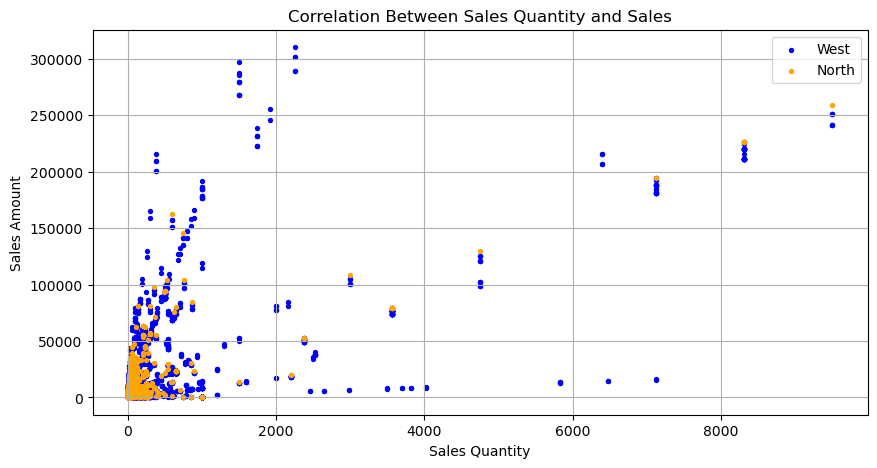

In [874]:
plt.figure(figsize=(10,5))
plt.xlabel('Sales Quantity')
plt.ylabel('Sales Amount')
plt.scatter(data=amazon_6[amazon_6['Region'] == 'West'],s=8,x='Sales Quantity',y='Sales Amount',color='blue',label='West')
plt.scatter(data=amazon_6[amazon_6['Region'] == 'North'],s=8,x='Sales Quantity',y='Sales Amount',color='orange',label='North')
plt.legend()
plt.title('Correlation Between Sales Quantity and Sales')
plt.grid()
plt.show()

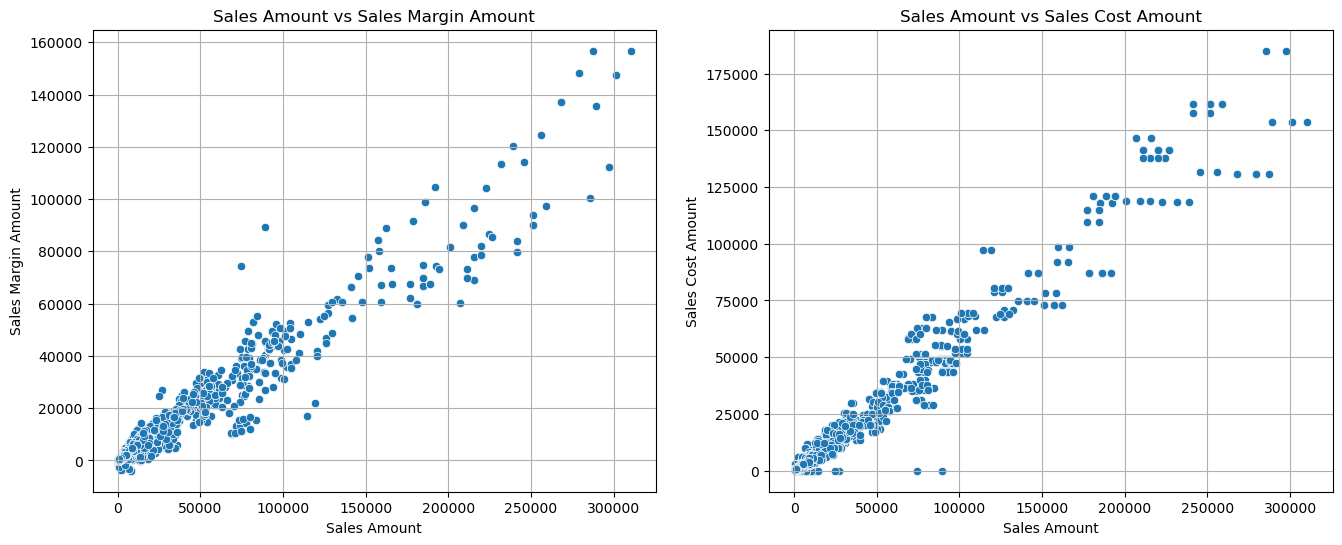

In [876]:
plt.figure(figsize=(16,6))
plt.subplot(1,2,1)
sns.scatterplot(data=amazon_6,x=amazon_6['Sales Amount'],y=amazon_6['Sales Margin Amount'])
plt.title('Sales Amount vs Sales Margin Amount')
plt.grid()
plt.subplot(1,2,2)
sns.scatterplot(data=amazon_6,x=amazon_6['Sales Amount'],y=amazon_6['Sales Cost Amount'])
plt.title('Sales Amount vs Sales Cost Amount')
plt.grid()
plt.show()

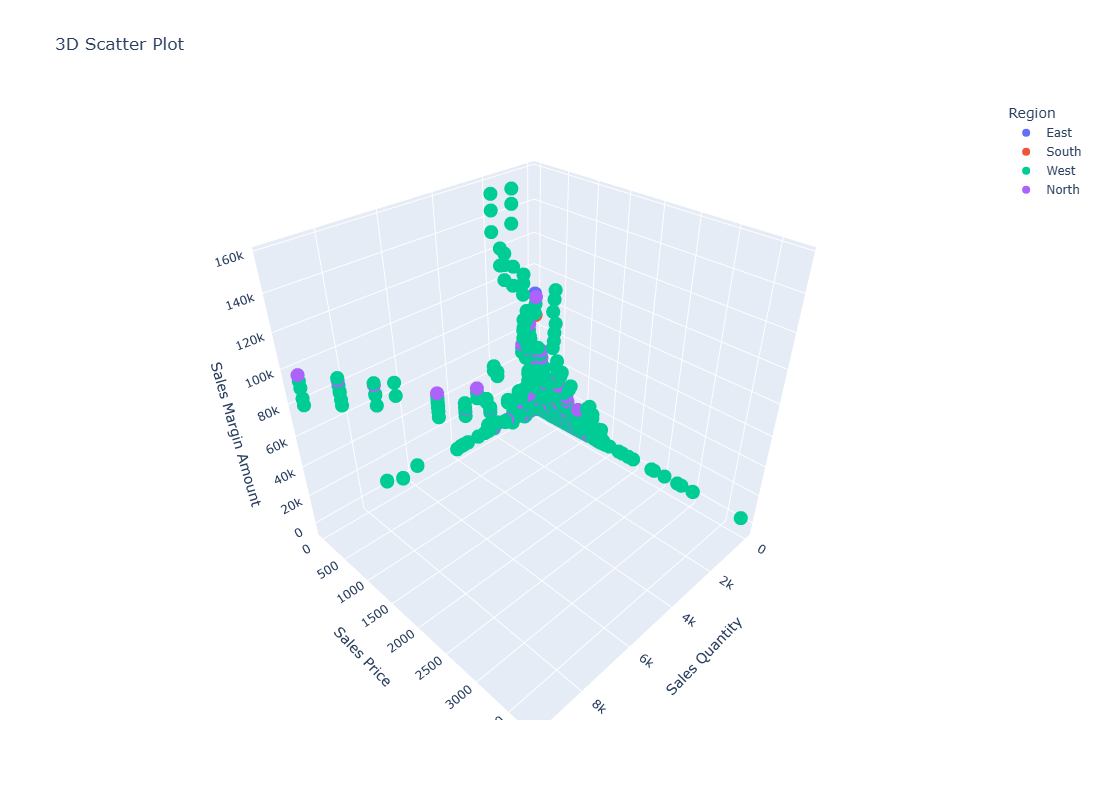

In [880]:
px.scatter_3d(data_frame=amazon_6,x='Sales Quantity',y='Sales Price',z='Sales Margin Amount',color='Region',height=800,width=1000,title='3D Scatter Plot')

## Month and Year Wise Sales and Sales Margin Analysis

In [886]:
year_agg = amazon_6.groupby(by='Invoice Year').agg({'Sales Quantity':'sum','Sales Amount':'sum','Sales Cost Amount':'sum','Sales Margin Amount':'sum'}).reset_index()

In [888]:
year_agg.head()

Invoice Year  Sales Quantity  Sales Amount  Sales Cost Amount  \
0          2017         1207335   82345986.97        46629314.40   
1          2018          283425   19317955.80        10680168.06   
2          2019         1112419   73099625.11        43346576.74   

   Sales Margin Amount  
0          35716672.57  
1           8637787.74  
2          29753048.37

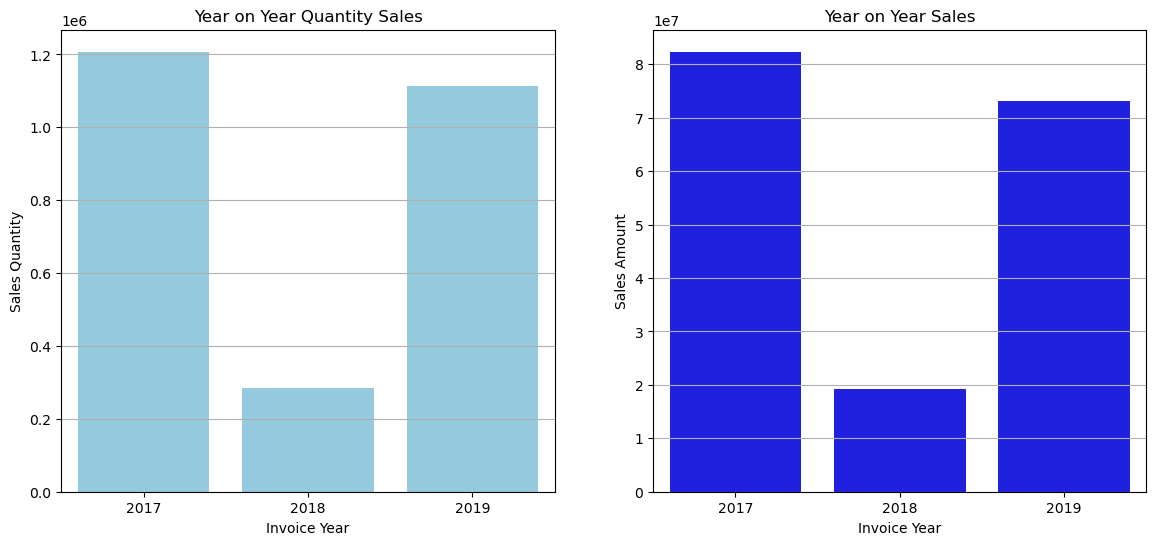

In [892]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
plt.grid()
sns.barplot(data=year_agg,x=year_agg['Invoice Year'],y=year_agg['Sales Quantity'],color='skyblue')
plt.title('Year on Year Quantity Sales')
plt.subplot(1,2,2)
plt.grid()
sns.barplot(data=year_agg,x=year_agg['Invoice Year'],y=year_agg['Sales Amount'],color='blue')
plt.title('Year on Year Sales')
plt.show()

In [894]:
date_agg = amazon_6.groupby(by='Short Date').agg({'Sales Quantity':'sum','Sales Amount':'sum','Sales Cost Amount':'sum','Sales Margin Amount':'sum'}).reset_index()

In [896]:
date_agg.head()

Short Date  Sales Quantity  Sales Amount  Sales Cost Amount  \
0 2017-01-01          120595    8036077.95         4631909.12   
1 2017-02-01          105980    6758007.65         3846309.64   
2 2017-03-01          100018    7109205.47         4017632.24   
3 2017-04-01           71772    5111433.87         2872058.81   
4 2017-05-01           87215    5433500.45         3011924.35   

   Sales Margin Amount  
0           3404168.83  
1           2911698.01  
2           3091573.23  
3           2239375.06  
4           2421576.10

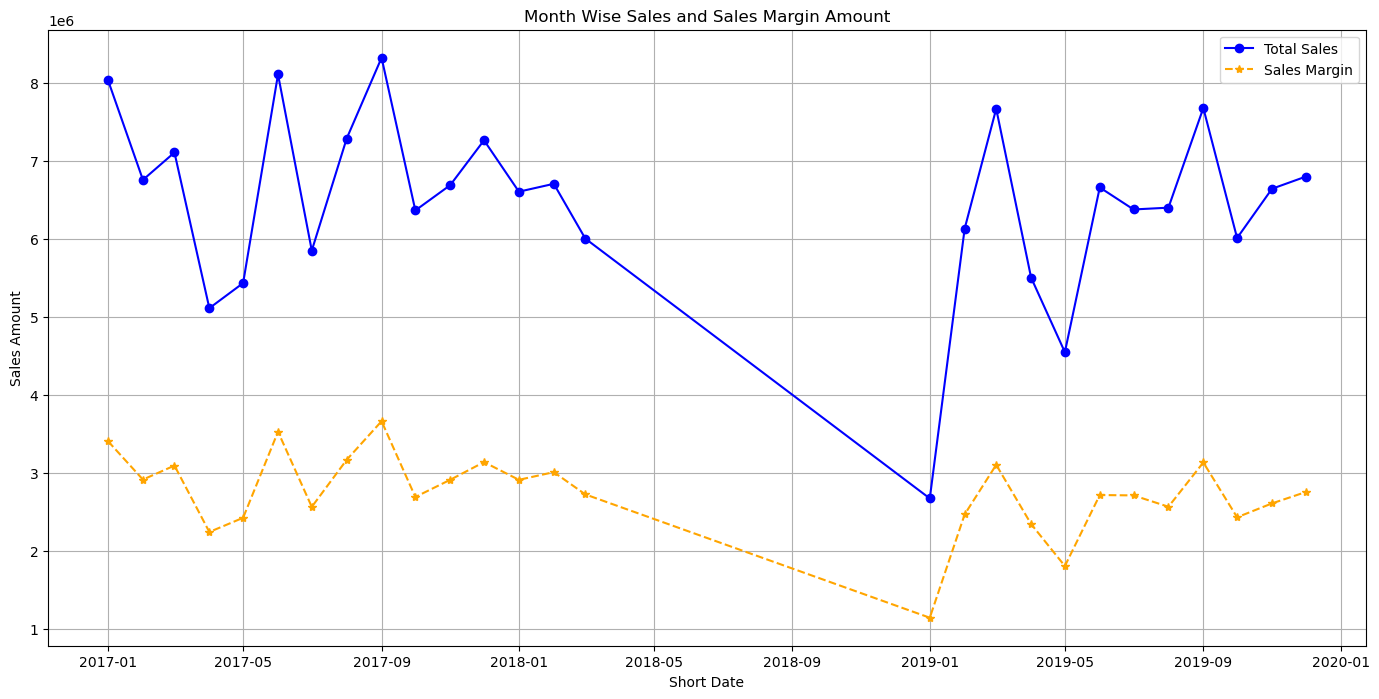

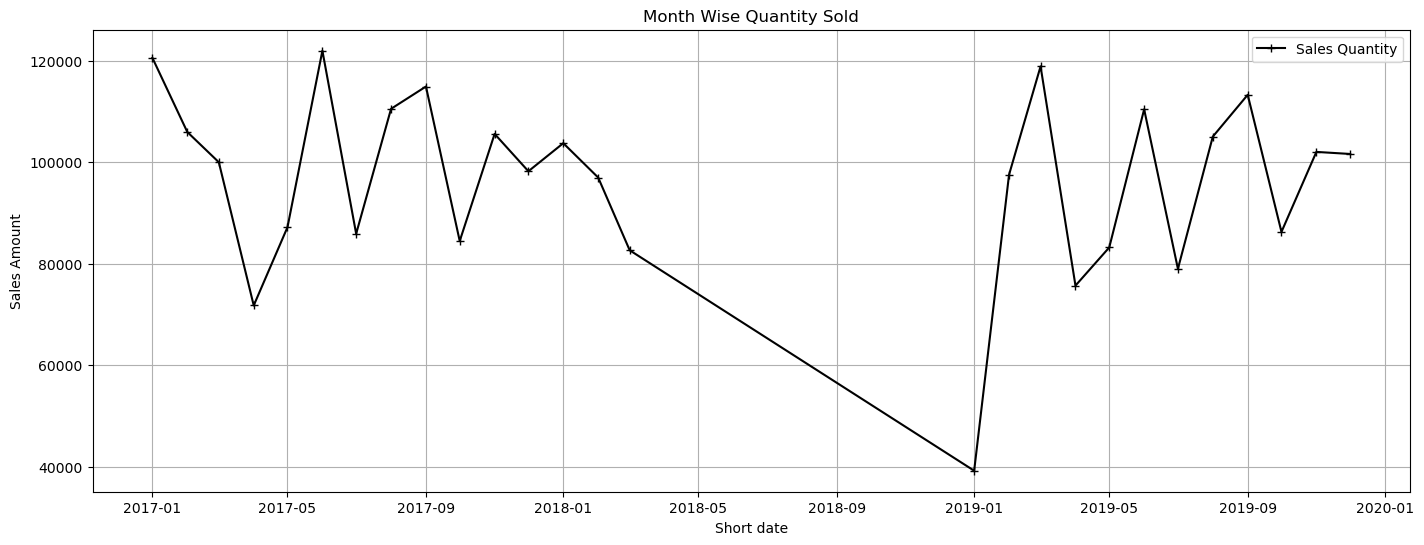

In [898]:
plt.figure(figsize=(17,8))
plt.grid()
plt.xlabel('Short Date')
plt.ylabel('Sales Amount')
plt.plot(date_agg['Short Date'], date_agg['Sales Amount'],color='blue',marker='o',label='Total Sales')
plt.plot(date_agg['Short Date'],date_agg['Sales Margin Amount'],color='orange',marker='*',linestyle='--',label='Sales Margin')
plt.legend()
plt.title('Month Wise Sales and Sales Margin Amount')
plt.figure(figsize=(17,6))
plt.xlabel('Short date')
plt.ylabel('Sales Amount')
plt.plot(date_agg['Short Date'],date_agg['Sales Quantity'],color='black',marker='+',label='Sales Quantity')
plt.grid()
plt.legend()
plt.title('Month Wise Quantity Sold')
plt.show()

## Item Wise Sales Analysis

In [902]:
item_agg = amazon_6.groupby(by='Item').agg({'Item Number':'count','Sales Quantity':'mean','Sales Price':'mean','Sales Amount':'mean','Discount Amount':'mean','Sales Cost Amount':'mean','Sales Margin Amount':'mean'}).reset_index()

In [904]:
item_agg['Sales Quantity'] = item_agg['Sales Quantity'].round()

In [906]:
item_agg['Sales Price'] =  item_agg['Sales Price'].round(2)

In [908]:
item_agg['Sales Amount'] = item_agg['Sales Amount'].round(2)

In [910]:
item_agg['Discount Amount'] = item_agg['Discount Amount'].round(2)

In [912]:
item_agg['Sales Cost Amount'] = item_agg['Sales Cost Amount'].round(2)

In [914]:
item_agg['Sales Margin Amount'] = item_agg['Sales Margin Amount'].round(2)

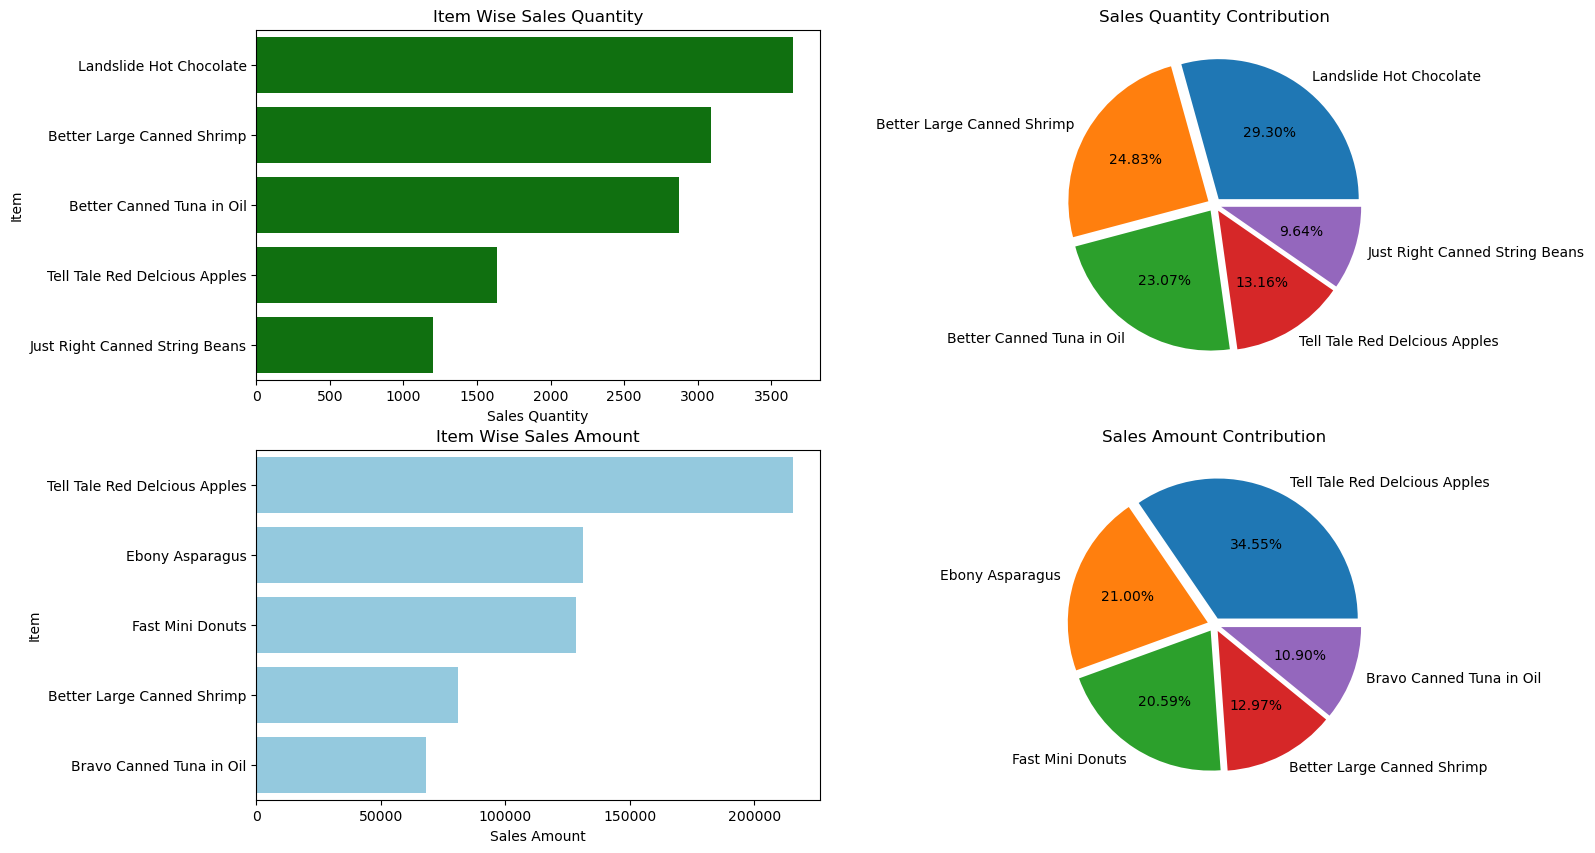

In [916]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.barplot(data=item_agg,y=item_agg['Item'],x=item_agg['Sales Quantity'],order=item_agg.sort_values(by='Sales Quantity',ascending=False).Item.head(),color='green')
plt.title('Item Wise Sales Quantity')
plt.subplot(2,2,2)
plt.pie(x=item_agg.sort_values(by='Sales Quantity',ascending=False)['Sales Quantity'].head(),autopct='%1.2f%%',labels=item_agg.sort_values(by='Sales Quantity',ascending=False)['Item'].head(),explode=len(item_agg.sort_values(by='Sales Quantity',ascending=False)['Sales Quantity'].head())*[0.05])
plt.title('Sales Quantity Contribution')
plt.subplot(2,2,3)
sns.barplot(data=item_agg,y=item_agg['Item'],x=item_agg['Sales Amount'],order=item_agg.sort_values(by='Sales Amount',ascending=False).Item.head(),color='skyblue')
plt.title('Item Wise Sales Amount')
plt.subplot(2,2,4)
plt.pie(x=item_agg.sort_values(by='Sales Amount',ascending=False)['Sales Amount'].head(),autopct='%1.2f%%',labels=item_agg.sort_values(by='Sales Amount',ascending=False)['Item'].head(),explode=len(item_agg.sort_values(by='Sales Amount',ascending=False)['Sales Amount'].head())*[0.05])
plt.title('Sales Amount Contribution')
plt.show()

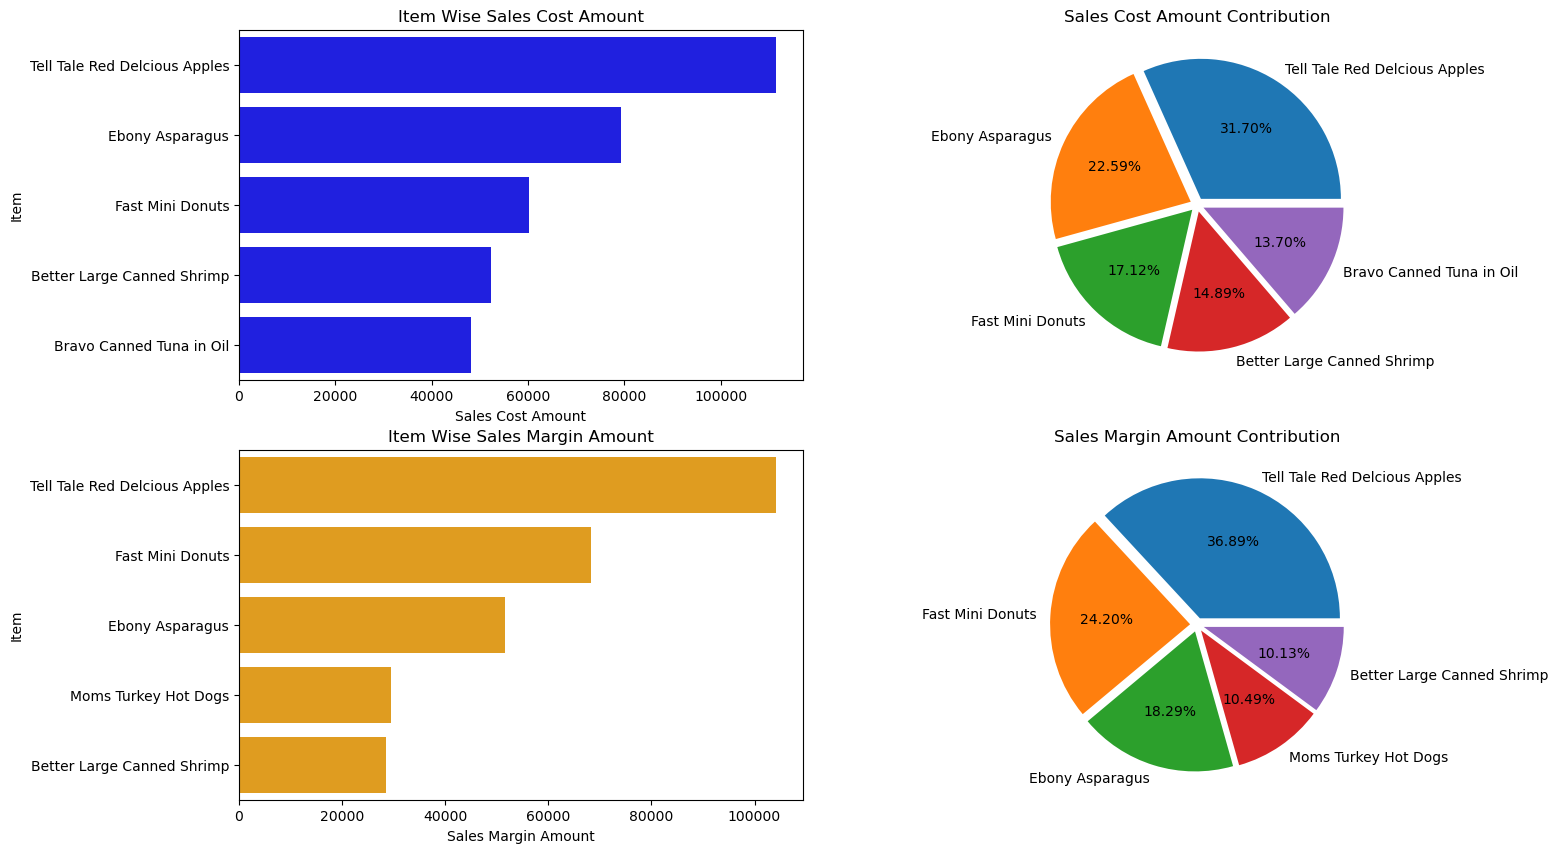

In [918]:
plt.figure(figsize=(16,10))
plt.subplot(2,2,1)
sns.barplot(data=item_agg,y=item_agg['Item'],x=item_agg['Sales Cost Amount'],order=item_agg.sort_values(by='Sales Cost Amount',ascending=False).Item.head(),color='blue')
plt.title('Item Wise Sales Cost Amount')
plt.subplot(2,2,2)
plt.pie(x=item_agg.sort_values(by='Sales Cost Amount',ascending=False)['Sales Cost Amount'].head(),autopct='%1.2f%%',labels=item_agg.sort_values(by='Sales Cost Amount',ascending=False)['Item'].head(),explode=len(item_agg.sort_values(by='Sales Cost Amount',ascending=False)['Sales Cost Amount'].head())*[0.05])
plt.title('Sales Cost Amount Contribution')
plt.subplot(2,2,3)
sns.barplot(data=item_agg,y=item_agg['Item'],x=item_agg['Sales Margin Amount'],order=item_agg.sort_values(by='Sales Margin Amount',ascending=False).Item.head(),color='orange')
plt.title('Item Wise Sales Margin Amount')
plt.subplot(2,2,4)
plt.pie(x=item_agg.sort_values(by='Sales Margin Amount', ascending=False)['Sales Margin Amount'].head(),autopct='%1.2f%%',explode=len(item_agg.sort_values(by='Sales Margin Amount',ascending=False)['Sales Margin Amount'].head())*[0.05],labels=item_agg.sort_values(by='Sales Margin Amount', ascending=False)['Item'].head())
plt.title('Sales Margin Amount Contribution')
plt.show()

## Region Wise Sales Data Analysis

In [922]:
region_agg = amazon_6.groupby(by='Region',as_index=False).agg({'Sales Quantity':'sum','Sales Price':'mean','Sales Amount':'sum','Discount Amount':'sum','Sales Cost Amount':'sum','Sales Margin Amount':'sum'})

In [924]:
region_agg.head()

Region  Sales Quantity  Sales Price  Sales Amount  Discount Amount  \
0  East             1007   352.107714  1.399338e+05     1.435389e+05   
1  North          186557   286.370398  1.339365e+07     9.212394e+06   
2  South           14412   275.480964  1.315439e+06     9.380421e+05   
3   West         2401203   283.036454  1.599145e+08     1.106320e+08   

   Sales Cost Amount  Sales Margin Amount  
0               0.00            139933.82  
1         7352973.11           6040676.52  
2          575604.84            739834.61  
3        92727481.25          67187063.73

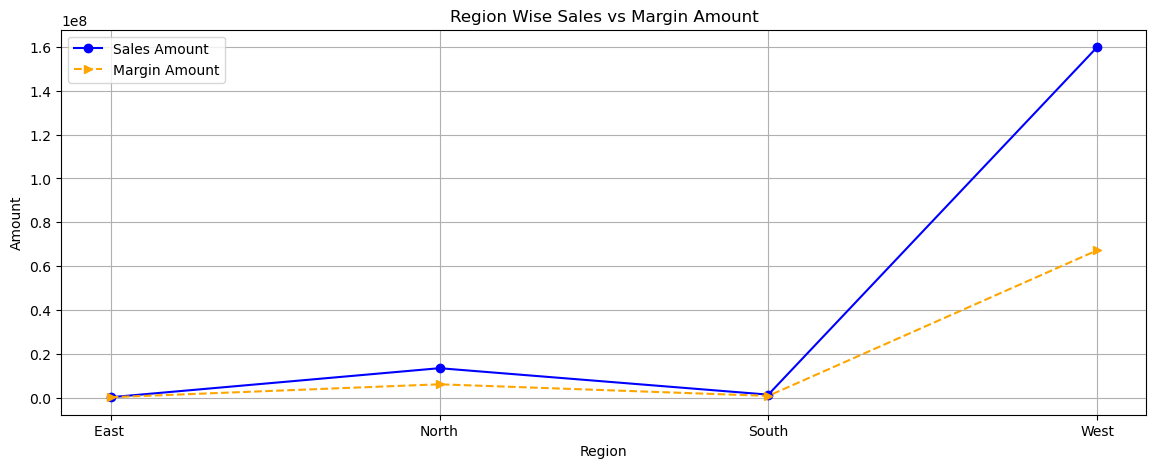

In [930]:
plt.figure(figsize=(14,5))
plt.xlabel('Region')
plt.ylabel('Amount')
plt.plot(region_agg['Region'],region_agg['Sales Amount'],color='blue',marker='o',label='Sales Amount')
plt.plot(region_agg['Region'],region_agg['Sales Margin Amount'],color='orange',marker='>',linestyle='--',label='Margin Amount')
plt.grid()
plt.legend()
plt.title('Region Wise Sales vs Margin Amount')
plt.show()

## Month Wise Sales of Particular Region Analysis

In [932]:
region_agg_1 = amazon_6.groupby(by=['Region','Short Date'],as_index=False).agg({'Sales Quantity':'sum','Sales Price':'mean','Sales Amount':'sum','Discount Amount':'sum','Sales Cost Amount':'sum','Sales Margin Amount':'sum','CustKey':'count'})

In [934]:
region_agg_1.head()

Region Short Date  Sales Quantity  Sales Price  Sales Amount  \
0  East  2017-05-01             805   100.750000      91121.16   
1  East  2017-06-01             129   269.232857      22329.95   
2  East  2017-07-01              32   380.116364      11323.86   
3  East  2017-08-01               1   346.530000        346.53   
4  East  2017-09-01              16   472.397500       7840.23   

   Discount Amount  Sales Cost Amount  Sales Margin Amount  CustKey  
0         96718.94                0.0             91121.16        2  
1         25383.73                0.0             22329.95        7  
2          8368.61                0.0             11323.86       11  
3             0.00                0.0               346.53        1  
4          6804.68                0.0              7840.23        4

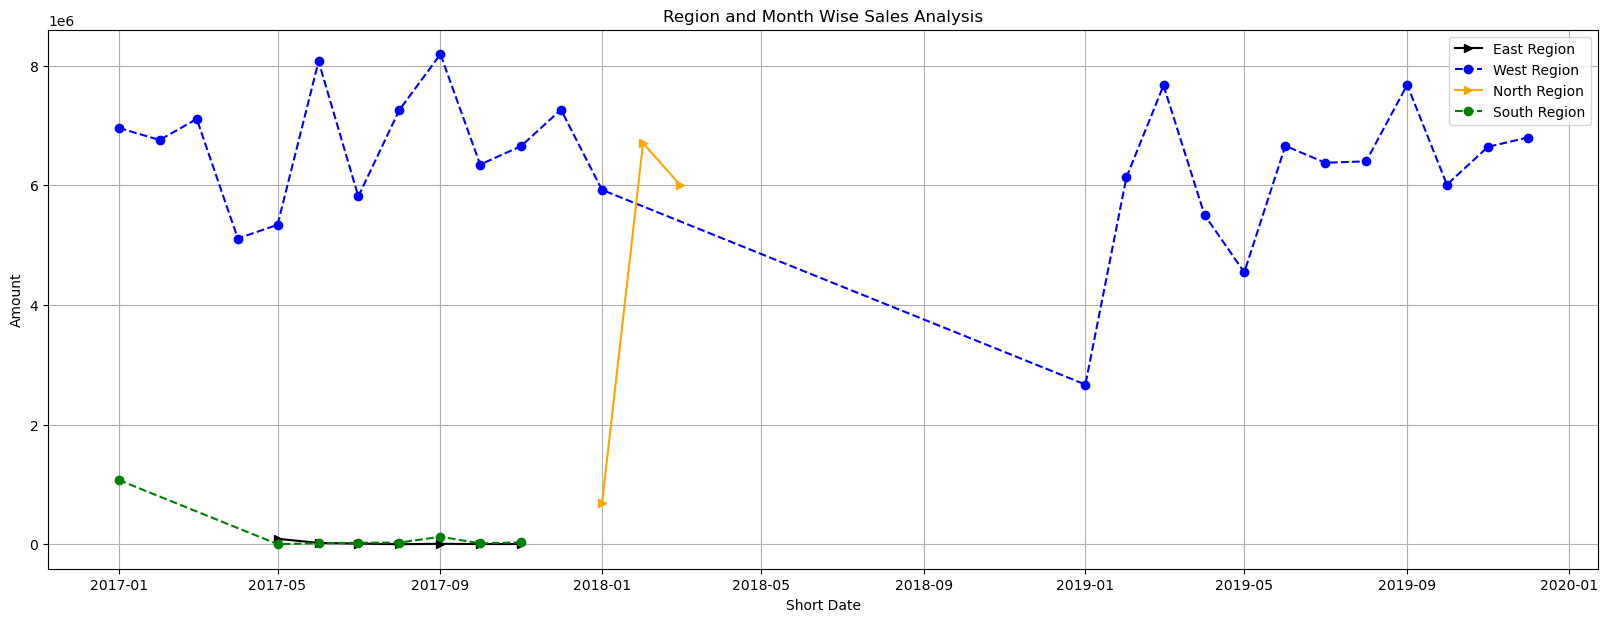

In [942]:
plt.figure(figsize=(20,7))
plt.xlabel('Short Date')
plt.ylabel('Amount')
plt.plot(region_agg_1[region_agg_1['Region'] == 'East ']['Short Date'],region_agg_1[region_agg_1['Region'] == 'East ']['Sales Amount'],color='black',label='East Region',marker='>')
plt.plot(region_agg_1[region_agg_1['Region'] == 'West']['Short Date'],region_agg_1[region_agg_1['Region'] == 'West']['Sales Amount'],color='blue',label='West Region',linestyle='--',marker='o')
plt.plot(region_agg_1[region_agg_1['Region'] == 'North']['Short Date'],region_agg_1[region_agg_1['Region'] == 'North']['Sales Amount'],color='orange',label='North Region',marker='>')
plt.plot(region_agg_1[region_agg_1['Region'] == 'South']['Short Date'],region_agg_1[region_agg_1['Region'] == 'South']['Sales Amount'],color='green',label='South Region',linestyle='--',marker='o')
plt.grid()
plt.legend()
plt.title('Region and Month Wise Sales Analysis')
plt.show()

## What is the Important Reason behind the West Region Sales are High

In [944]:
region_2 = amazon_6[['CustKey','Short Date','Item','Region','Sales Rep','Promised Delivery Date','List Price','Sales Quantity','Sales Amount Based on List Price','Sales Price','Sales Amount','Discount Amount','Sales Cost Amount','Sales Margin Amount','TAT']]

In [946]:
region_2.head(2)

CustKey Short Date                             Item Region  Sales Rep  \
1  10002220 2017-07-01               Moms Sliced Turkey  East         127   
2  10002220 2017-10-01  Cutting Edge Foot-Long Hot Dogs  East         127   

  Promised Delivery Date  List Price  Sales Quantity  \
1             2017-07-14      824.96               1   
2             2017-10-16      548.66               1   

   Sales Amount Based on List Price  Sales Price  Sales Amount  \
1                            824.96       456.17        456.17   
2                            548.66       438.93        438.93   

   Discount Amount  Sales Cost Amount  Sales Margin Amount     TAT  
1           368.79                0.0               456.17  0 days  
2           109.73                0.0               438.93 -1 days

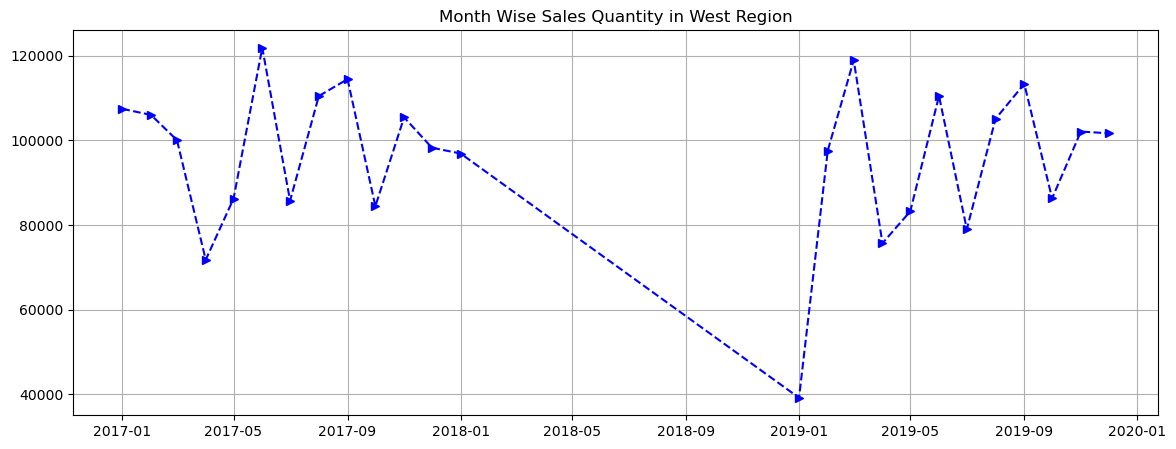

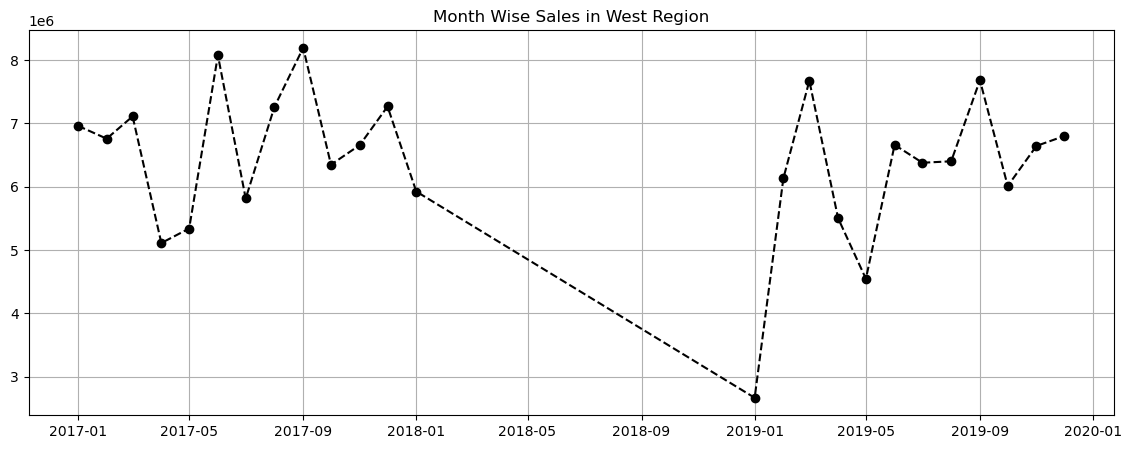

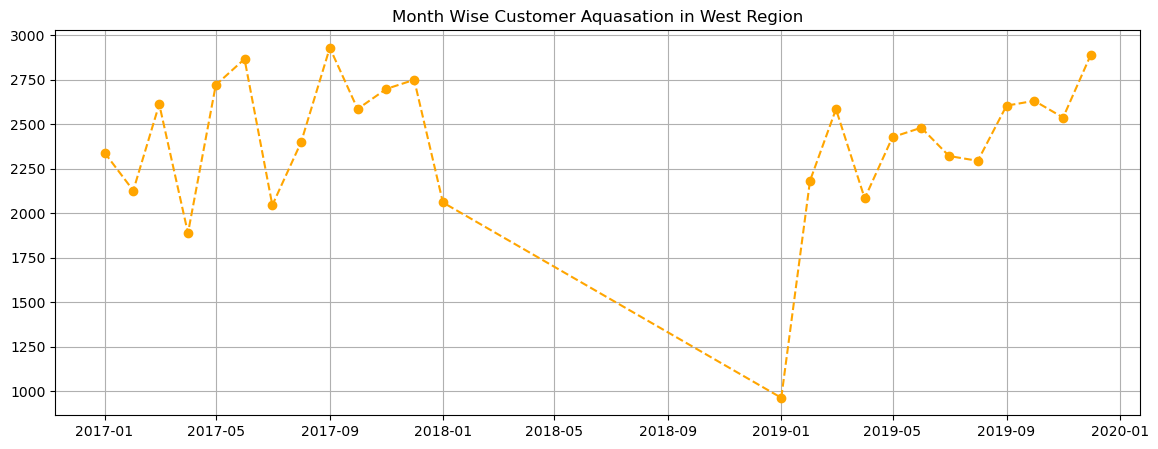

In [948]:
plt.figure(figsize=(14,5))
plt.plot(region_agg_1[region_agg_1['Region'] == 'West']['Short Date'],region_agg_1[region_agg_1['Region'] == 'West']['Sales Quantity'],color='blue',marker='>',linestyle='--')
plt.title('Month Wise Sales Quantity in West Region')
plt.grid()
plt.figure(figsize=(14,5))
plt.plot(region_agg_1[region_agg_1['Region'] == 'West']['Short Date'],region_agg_1[region_agg_1['Region'] == 'West']['Sales Amount'],color='black',marker='o',linestyle='--')
plt.title('Month Wise Sales in West Region')
plt.grid()
plt.figure(figsize=(14,5))
plt.plot(region_agg_1[region_agg_1['Region'] == 'West']['Short Date'],region_agg_1[region_agg_1['Region'] == 'West']['CustKey'],color='orange',marker='o',linestyle='--')
plt.title('Month Wise Customer Aquasation in West Region')
plt.grid()
plt.show()

## west_region New Dataframe

In [950]:
west_region = region_2[region_2['Region'] == 'West']

In [952]:
west_region.insert(column='Discount in %',value=west_region['Discount Amount']/west_region['Sales Amount Based on List Price']*100,loc=12)

In [954]:
west_region['Discount in %'] = west_region['Discount in %'].round(2)

In [956]:
west_region.head(2)

CustKey Short Date                       Item Region  Sales Rep  \
567  10002155 2017-01-01           Landslide Pepper   West        127   
568  10002969 2017-01-01  Best Choice Fudge Cookies   West        175   

    Promised Delivery Date  List Price  Sales Quantity  \
567             2017-01-05      195.61               2   
568             2017-01-05     1035.40               3   

     Sales Amount Based on List Price  Sales Price  Sales Amount  \
567                            391.22       103.28        206.56   
568                           3106.20       572.53       1717.60   

     Discount Amount  Discount in %  Sales Cost Amount  Sales Margin Amount  \
567           184.66           47.2              97.46               109.10   
568          1388.60           44.7            1018.42               699.18   

       TAT  
567 0 days  
568 0 days

## Top 5 Item Sales in West Region

In [958]:
west_item_agg = west_region.groupby(by="Item").agg({'Sales Quantity':'sum','Sales Price':'mean','Sales Amount':'sum','Sales Cost Amount':'sum','Sales Margin Amount':'sum','Discount in %':'mean'}).reset_index()

In [960]:
west_item_agg['Discount in %'] = west_item_agg['Discount in %'].round(2)

In [962]:
west_item_agg.head()

Item  Sales Quantity  Sales Price  Sales Amount  \
0      American Beef Bologna             200    11.777500       2357.30   
1  American Chicken Hot Dogs             113   105.228462      11858.89   
2       American Corned Beef            2451   214.071685     323275.83   
3      American Pimento Loaf             194   261.261349      48493.80   
4      American Potato Salad             187   225.868156      42058.62   

   Sales Cost Amount  Sales Margin Amount  Discount in %  
0            1643.60               713.70          53.16  
1            3885.85              7973.04          47.12  
2          191506.36            131769.47           -inf  
3           11594.44             36899.36           -inf  
4           37675.20              4383.42          51.21

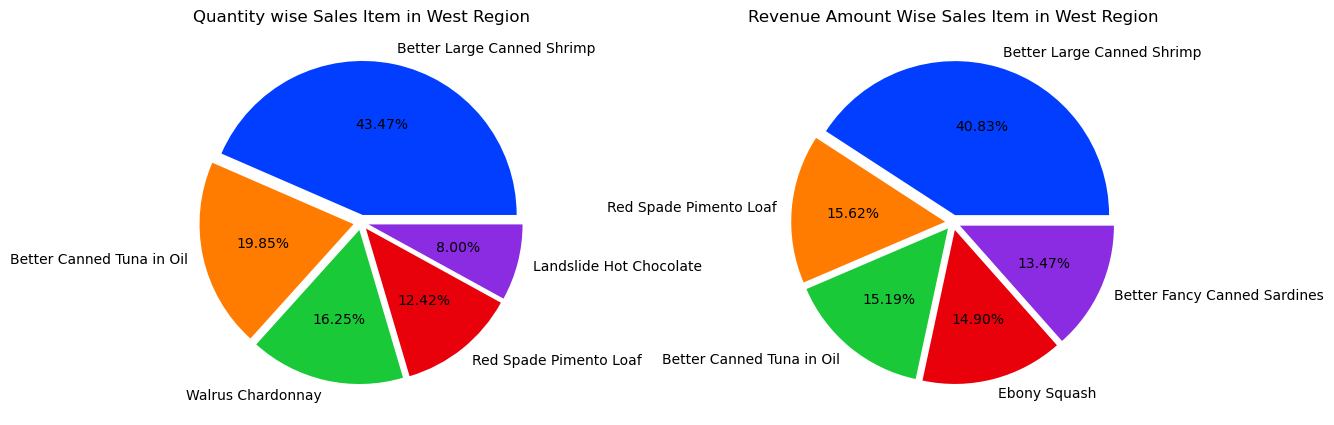

In [964]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(west_item_agg.sort_values(by='Sales Quantity',ascending=False)['Sales Quantity'].head(),colors=sns.color_palette('bright'),explode=len(west_item_agg.sort_values(by='Sales Quantity',ascending=False)['Sales Quantity'].head())*[0.05],autopct='%1.2f%%',labels=west_item_agg.sort_values(by='Sales Quantity',ascending=False)['Item'].head())
plt.title('Quantity wise Sales Item in West Region')
plt.subplot(1,2,2)
plt.pie(x=west_item_agg.sort_values(by='Sales Amount',ascending=False)['Sales Amount'].head(),autopct='%1.2f%%',labels=west_item_agg.sort_values(by='Sales Amount',ascending=False)['Item'].head(),explode=len(west_item_agg.sort_values(by='Sales Amount',ascending=False)['Sales Amount'].head())*[0.05],colors=sns.color_palette('bright'))
plt.title('Revenue Amount Wise Sales Item in West Region')
plt.show()

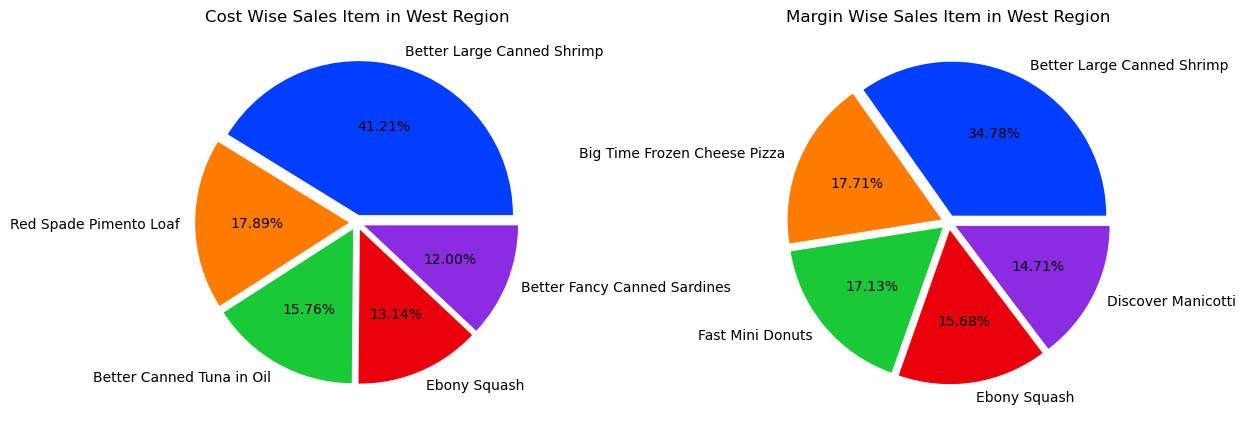

In [966]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
plt.pie(west_item_agg.sort_values(by='Sales Cost Amount',ascending=False)['Sales Cost Amount'].head(),explode=len(west_item_agg.sort_values(by='Sales Cost Amount',ascending=False)['Sales Cost Amount'].head())*[0.05],colors=sns.color_palette('bright'),autopct='%1.2f%%',labels=west_item_agg.sort_values(by='Sales Cost Amount',ascending=False)['Item'].head())
plt.title('Cost Wise Sales Item in West Region')
plt.subplot(1,2,2)
plt.pie(west_item_agg.sort_values(by='Sales Margin Amount',ascending=False)['Sales Margin Amount'].head(),explode=len(west_item_agg.sort_values(by='Sales Margin Amount',ascending=False)['Sales Margin Amount'].head())*[0.05],autopct='%1.2f%%',colors=sns.color_palette('bright'),labels=west_item_agg.sort_values(by='Sales Margin Amount',ascending=False)['Item'].head())
plt.title('Margin Wise Sales Item in West Region')
plt.show()

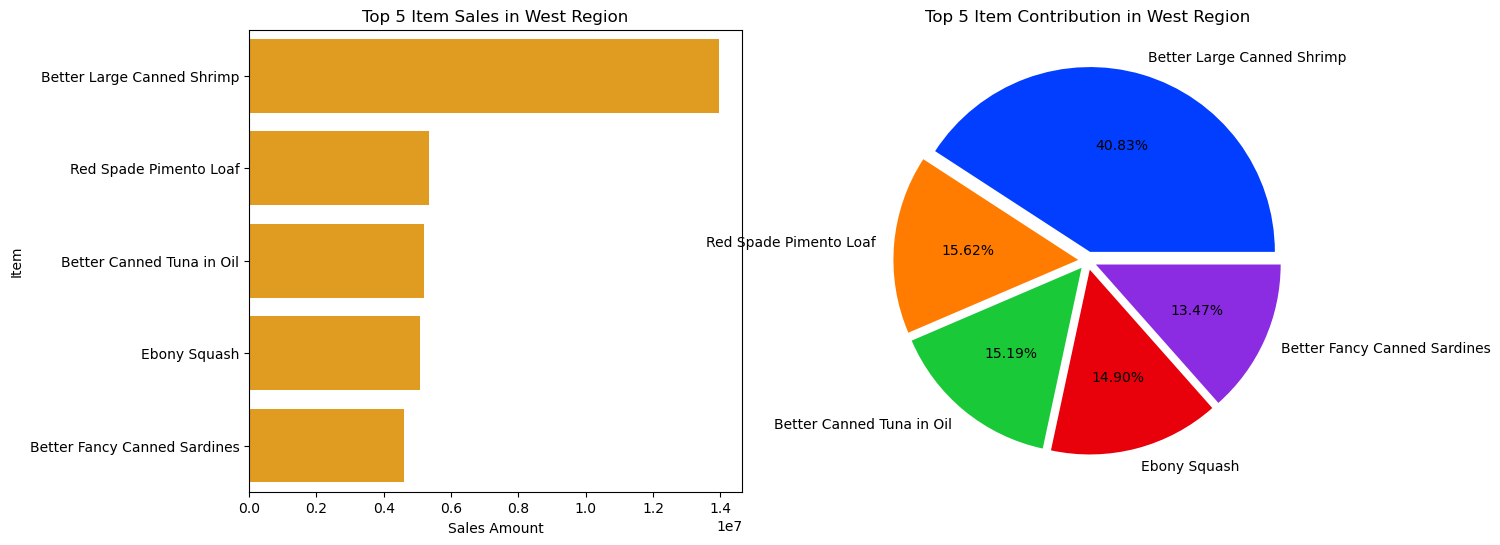

In [968]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=west_item_agg.sort_values(by='Sales Amount', ascending=False).head(5), x='Sales Amount', y='Item',color='orange')
plt.title('Top 5 Item Sales in West Region')
plt.subplot(1,2,2)
plt.pie(x=west_item_agg.sort_values(by='Sales Amount',ascending=False)['Sales Amount'].head(),autopct='%1.2f%%',labels=west_item_agg.sort_values(by='Sales Amount',ascending=False)['Item'].head(),explode=len(west_item_agg.sort_values(by='Sales Amount',ascending=False)['Sales Amount'].head())*[0.05],colors=sns.color_palette('bright'))
plt.title('Top 5 Item Contribution in West Region')
plt.show()

In [970]:
west_item_agg = west_region.groupby(by=["Item",'Short Date']).agg({'Sales Quantity':'sum','Sales Price':'mean','Sales Amount':'sum','Sales Cost Amount':'sum','Sales Margin Amount':'sum','Discount in %':'mean'}).reset_index()

In [972]:
west_item_agg['Discount in %'] = west_item_agg['Discount in %'].round(2)

In [974]:
west_region.head(2)

CustKey Short Date                       Item Region  Sales Rep  \
567  10002155 2017-01-01           Landslide Pepper   West        127   
568  10002969 2017-01-01  Best Choice Fudge Cookies   West        175   

    Promised Delivery Date  List Price  Sales Quantity  \
567             2017-01-05      195.61               2   
568             2017-01-05     1035.40               3   

     Sales Amount Based on List Price  Sales Price  Sales Amount  \
567                            391.22       103.28        206.56   
568                           3106.20       572.53       1717.60   

     Discount Amount  Discount in %  Sales Cost Amount  Sales Margin Amount  \
567           184.66           47.2              97.46               109.10   
568          1388.60           44.7            1018.42               699.18   

       TAT  
567 0 days  
568 0 days

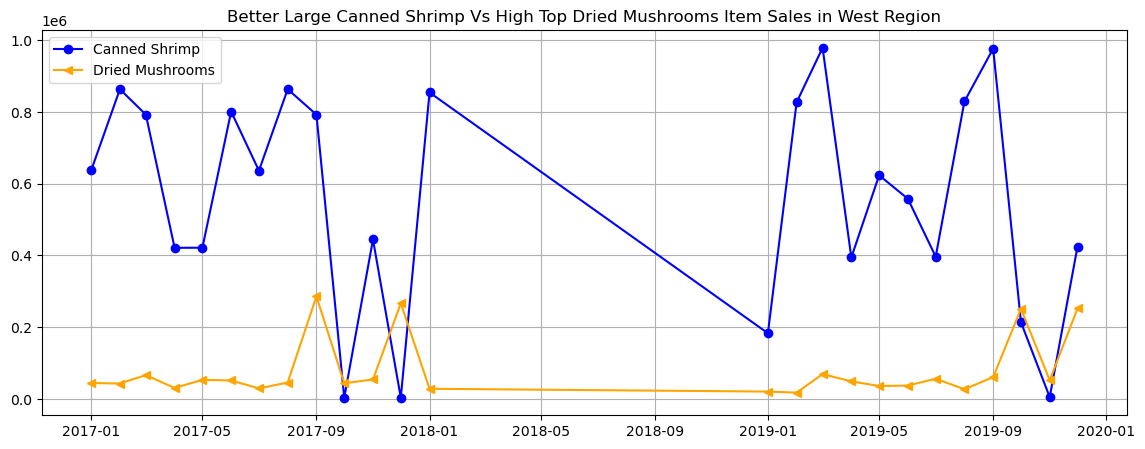

In [976]:
plt.figure(figsize=(14,5))
plt.plot(west_item_agg[west_item_agg['Item'] == 'Better Large Canned Shrimp']['Short Date'],west_item_agg[west_item_agg['Item'] == 'Better Large Canned Shrimp']['Sales Amount'],color='blue',marker='o',label='Canned Shrimp')
plt.plot(west_item_agg[west_item_agg['Item'] == 'High Top Dried Mushrooms']['Short Date'],west_item_agg[west_item_agg['Item'] == 'High Top Dried Mushrooms']['Sales Amount'],color='orange',marker='<',label='Dried Mushrooms')
plt.grid()
plt.legend()
plt.title('Better Large Canned Shrimp Vs High Top Dried Mushrooms Item Sales in West Region')
plt.show()

## Repetative Customer Analysis in West Region

In [980]:
custkey_agg = west_region.groupby(by='CustKey').agg({'Item':'count','Sales Quantity':'sum','Sales Amount':'sum','Discount in %':'mean','Sales Cost Amount':'mean','Sales Margin Amount':'sum'}).reset_index()

In [982]:
custkey_agg['CustKey'] = custkey_agg['CustKey'].astype('string')

In [984]:
custkey_agg['Discount in %'] = custkey_agg['Discount in %'].round(2)

In [986]:
custkey_agg.head()

CustKey  Item  Sales Quantity  Sales Amount  Discount in %  \
0  10000453   329             940     180549.30          47.20   
1  10000455    19             179      22403.73          40.00   
2  10000456   104            1499     227440.19          50.86   
3  10000457    19             373      29723.40          37.93   
4  10000458     8             300      99752.07          46.14   

   Sales Cost Amount  Sales Margin Amount  
0         314.365957             77122.90  
1         367.961579             15412.46  
2        1213.281731            101258.89  
3         707.805263             16275.10  
4        7924.591250             36355.34

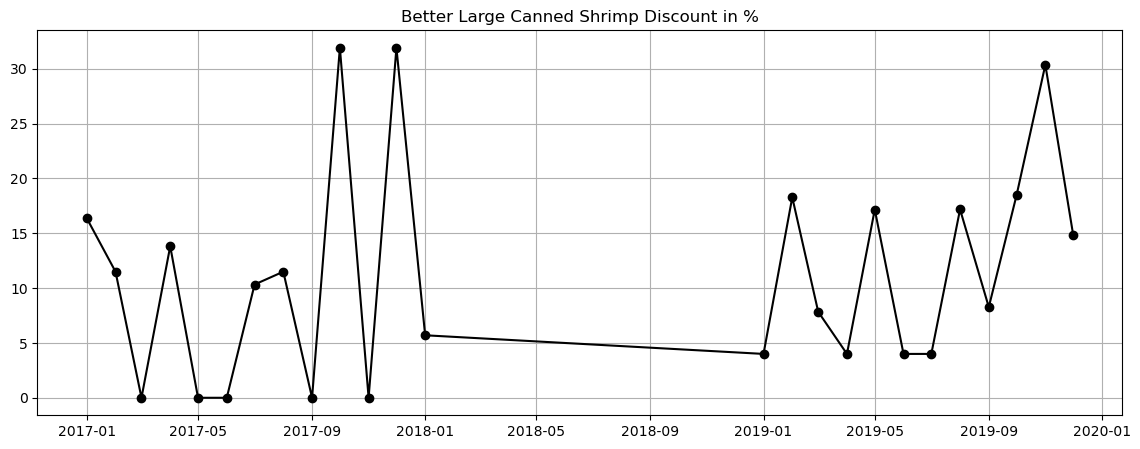

In [988]:
plt.figure(figsize=(14,5))
plt.plot(west_item_agg[west_item_agg['Item'] == 'Better Large Canned Shrimp']['Short Date'],west_item_agg[west_item_agg['Item'] == 'Better Large Canned Shrimp']['Discount in %'],color='black',marker='o')
plt.grid()
plt.title('Better Large Canned Shrimp Discount in %')
plt.show()

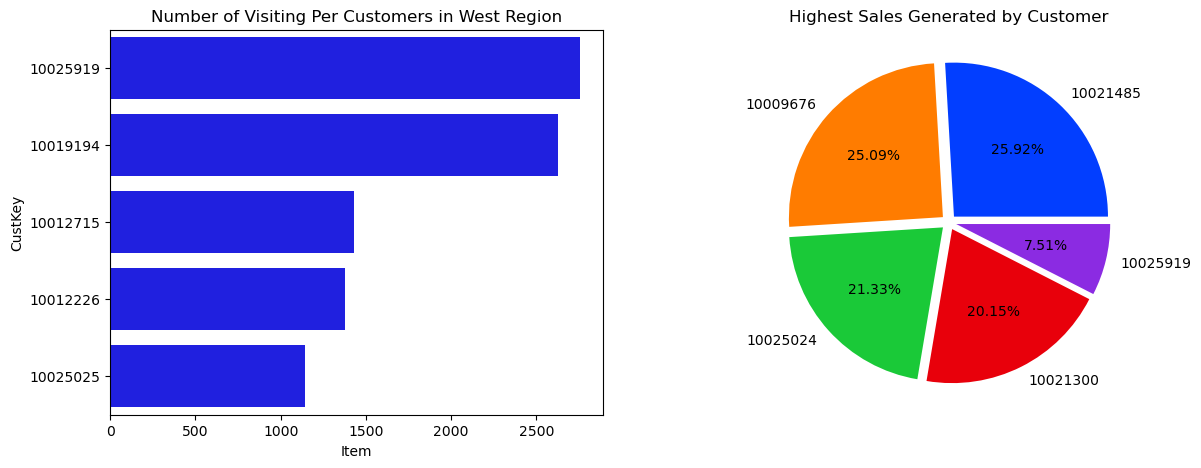

In [996]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.barplot(data=custkey_agg.sort_values(by='Item',ascending=False).head(),x='Item',y='CustKey',color='blue')
plt.title('Number of Visiting Per Customers in West Region')
plt.subplot(1,2,2)
plt.pie(custkey_agg.sort_values(by='Sales Amount',ascending=False)['Sales Amount'].head(),explode=len(custkey_agg.sort_values(by='Sales Amount',ascending=False)['Sales Amount'].head())*[0.05],colors=sns.color_palette('bright'),autopct='%1.2f%%',labels=custkey_agg.sort_values(by='Sales Amount',ascending=False)['CustKey'].head())
plt.title('Highest Sales Generated by Customer')
plt.show()

## Customer Trends Analysis

In [1000]:
custkey_agg = west_region.groupby(by=['CustKey','Short Date']).agg({'Item':'count','Sales Quantity':'sum','Sales Amount':'sum','Discount in %':'mean','Sales Cost Amount':'mean','Sales Margin Amount':'sum'}).reset_index()

In [1002]:
custkey_agg['CustKey'] = custkey_agg['CustKey'].astype('string')

In [1004]:
custkey_agg.head()

CustKey Short Date  Item  Sales Quantity  Sales Amount  Discount in %  \
0  10000453 2017-01-01    10              68       8422.15      47.449000   
1  10000453 2019-01-01    17              29       7638.64      47.231176   
2  10000453 2019-02-01    21              89      12260.91      47.550952   
3  10000453 2019-03-01    32              99      17979.29      47.498750   
4  10000453 2019-04-01    29              51      15348.21      47.285172   

   Sales Cost Amount  Sales Margin Amount  
0         473.495000              3687.20  
1         239.578824              3565.80  
2         364.363810              4609.27  
3         326.554375              7529.55  
4         279.985862              7228.62

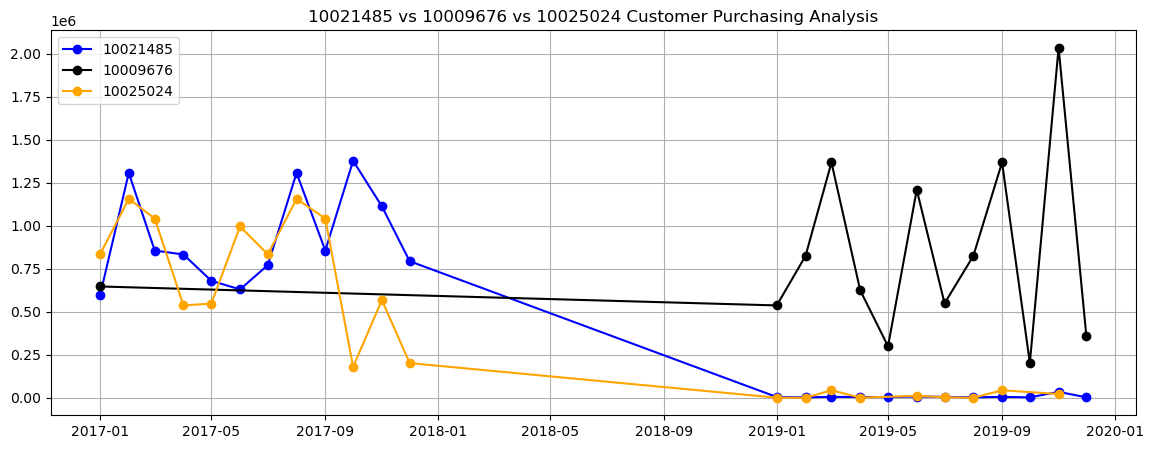

In [1006]:
plt.figure(figsize=(14,5))
plt.plot(custkey_agg[custkey_agg['CustKey'] == '10021485']['Short Date'],custkey_agg[custkey_agg['CustKey'] == '10021485']['Sales Amount'],color='blue',marker='o',label='10021485')
plt.plot(custkey_agg[custkey_agg['CustKey'] == '10009676']['Short Date'],custkey_agg[custkey_agg['CustKey'] == '10009676']['Sales Amount'],color='black',marker='o',label='10009676')
plt.plot(custkey_agg[custkey_agg['CustKey'] == '10025024']['Short Date'],custkey_agg[custkey_agg['CustKey'] == '10025024']['Sales Amount'],color='orange',marker='o',label='10025024')
plt.grid()
plt.legend()
plt.title('10021485 vs 10009676 vs 10025024 Customer Purchasing Analysis')
plt.show()

## 10021485, 10009676 and 10025024 Those Customers are Purchasing Which Types of Item in More

In [1008]:
west_region['CustKey'] = west_region['CustKey'].astype('string')

In [1010]:
cust_85 = west_region[west_region['CustKey'] == '10021485']

In [1012]:
cust_79 = west_region[west_region['CustKey'] == '10009676']

In [1014]:
cust_24 = west_region[west_region['CustKey'] == '10025024']

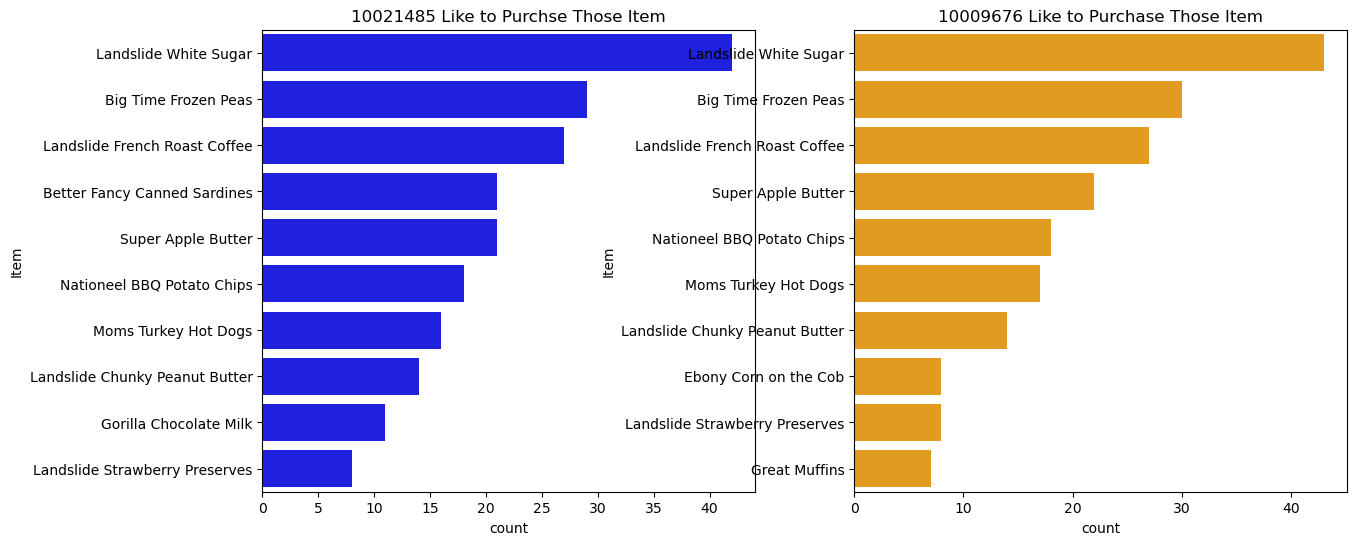

In [1016]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(data=cust_85,y=cust_85['Item'],order=cust_85['Item'].value_counts().head(10).index,color='blue')
plt.title('10021485 Like to Purchse Those Item')
plt.subplot(1,2,2)
sns.countplot(data=cust_79,y=cust_79['Item'],order=cust_79['Item'].value_counts().head(10).index,color='orange')
plt.title('10009676 Like to Purchase Those Item')
plt.show()

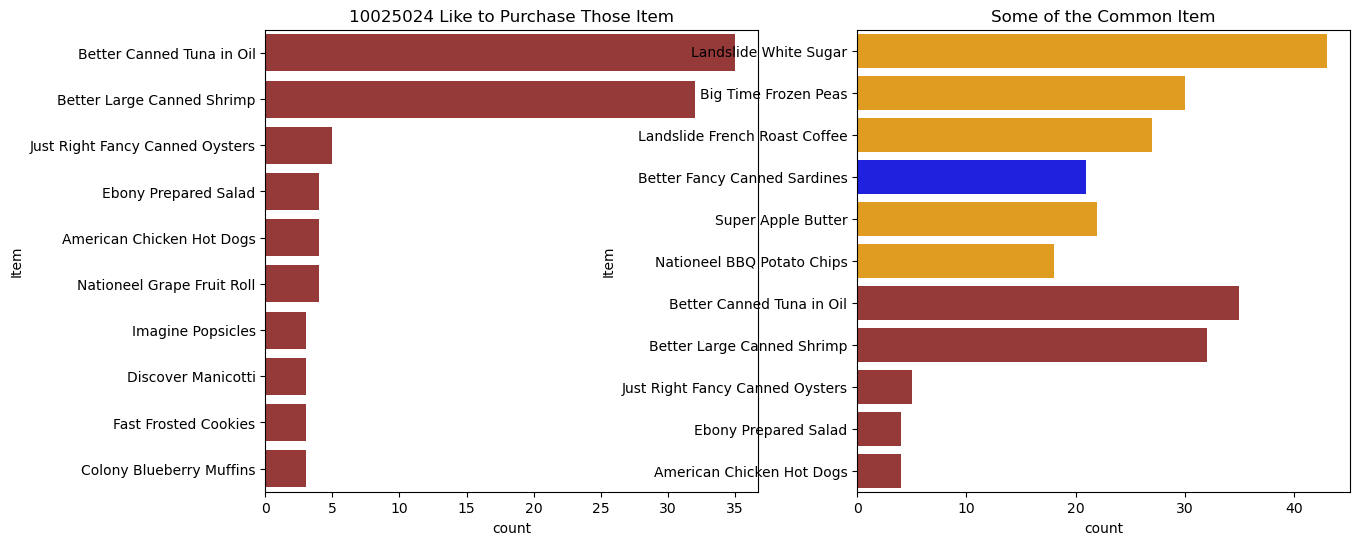

In [1019]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.countplot(data=cust_24,y=cust_24['Item'],order=cust_24['Item'].value_counts().head(10).index,color='brown')
plt.title('10025024 Like to Purchase Those Item')
plt.subplot(1,2,2)
sns.countplot(data=cust_85,y=cust_85['Item'],order=cust_85['Item'].value_counts().head().index,color='blue')
sns.countplot(data=cust_79,y=cust_79['Item'],order=cust_79['Item'].value_counts().head().index,color='orange')
sns.countplot(data=cust_24,y=cust_24['Item'],order=cust_24['Item'].value_counts().head().index,color='brown')
plt.title('Some of the Common Item')
plt.show()

## Top 2 Customer Purchasing Behaviour Analysis

In [ ]:
#Landside White Sugar
#Big Time Frozen Peas
# Landslide French Roast Coffee

In [1021]:
cust_top = west_region[(west_region['CustKey'] == '10021485') | (west_region['CustKey'] == '10009676')]

In [1023]:
cust_top.head(2)

CustKey Short Date                  Item Region  Sales Rep  \
574  10009676 2017-01-01  Big Time Frozen Peas   West        141   
575  10009676 2017-01-01     Bravo Noodle Soup   West        141   

    Promised Delivery Date  List Price  Sales Quantity  \
574             2017-01-05      645.63             100   
575             2017-01-05       91.50             100   

     Sales Amount Based on List Price  Sales Price  Sales Amount  \
574                          64563.03       295.03      29502.72   
575                           9150.00        41.81       4181.18   

     Discount Amount  Discount in %  Sales Cost Amount  Sales Margin Amount  \
574         35060.31           54.3           17032.33             12470.39   
575          4968.82           54.3            2475.38              1705.80   

       TAT  
574 0 days  
575 0 days

In [1025]:
import plotly
import plotly.graph_objects as go
import plotly.express as px

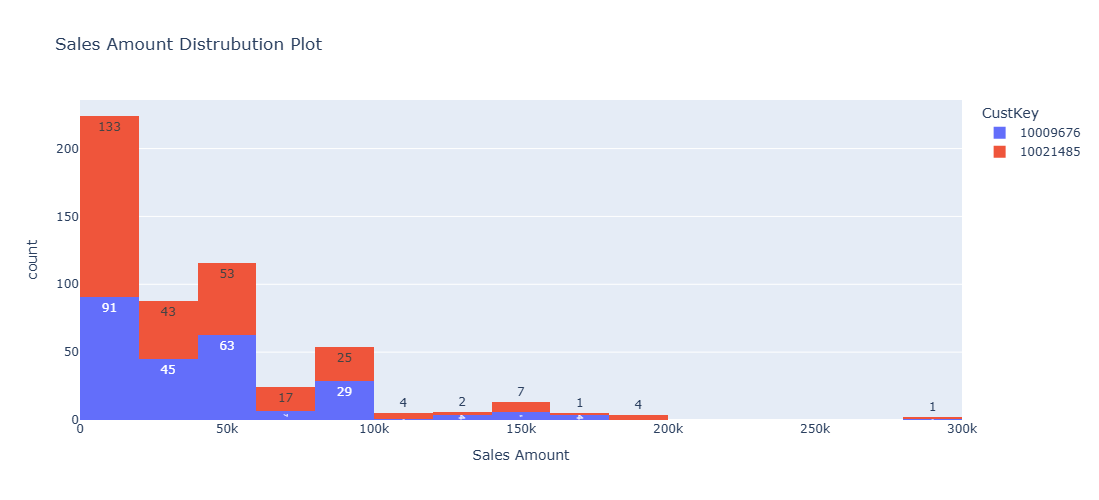

In [1027]:
px.histogram(data_frame=cust_top,x='Sales Amount',nbins=20,color='CustKey',height=500,width=800,text_auto=True,title='Sales Amount Distrubution Plot')

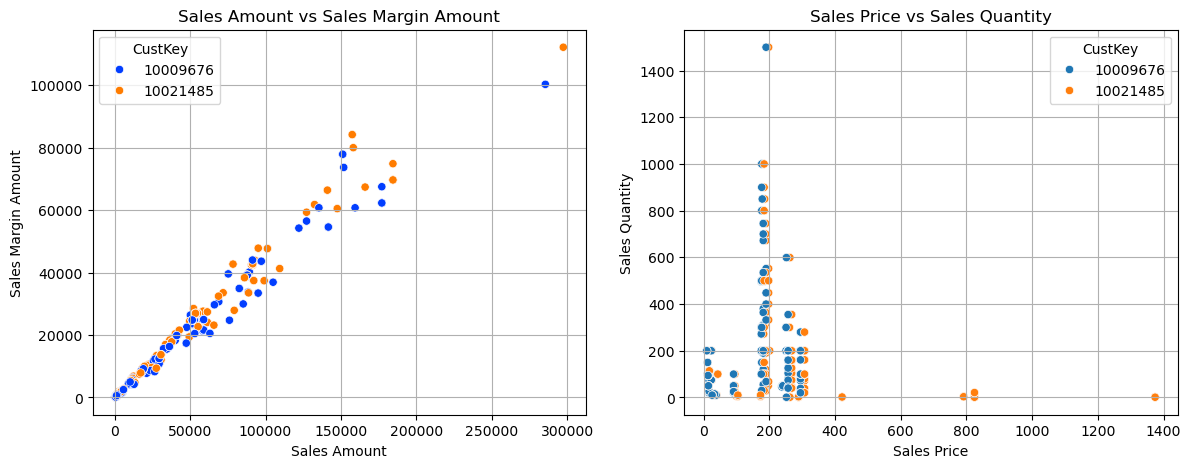

In [1031]:
plt.figure(figsize=(14,5))
plt.subplot(1,2,1)
sns.scatterplot(data=cust_top,x=cust_top['Sales Amount'],y=cust_top['Sales Margin Amount'],hue=cust_top['CustKey'],palette='bright')
plt.title('Sales Amount vs Sales Margin Amount')
plt.grid()
plt.subplot(1,2,2)
sns.scatterplot(data=cust_top,x=cust_top['Sales Price'],y=cust_top['Sales Quantity'],hue=cust_top['CustKey'])
plt.title('Sales Price vs Sales Quantity')
plt.grid()
plt.show()

## Tree Map of the entire Data

In [1033]:
region_agg_1.head()

Region Short Date  Sales Quantity  Sales Price  Sales Amount  \
0  East  2017-05-01             805   100.750000      91121.16   
1  East  2017-06-01             129   269.232857      22329.95   
2  East  2017-07-01              32   380.116364      11323.86   
3  East  2017-08-01               1   346.530000        346.53   
4  East  2017-09-01              16   472.397500       7840.23   

   Discount Amount  Sales Cost Amount  Sales Margin Amount  CustKey  
0         96718.94                0.0             91121.16        2  
1         25383.73                0.0             22329.95        7  
2          8368.61                0.0             11323.86       11  
3             0.00                0.0               346.53        1  
4          6804.68                0.0              7840.23        4

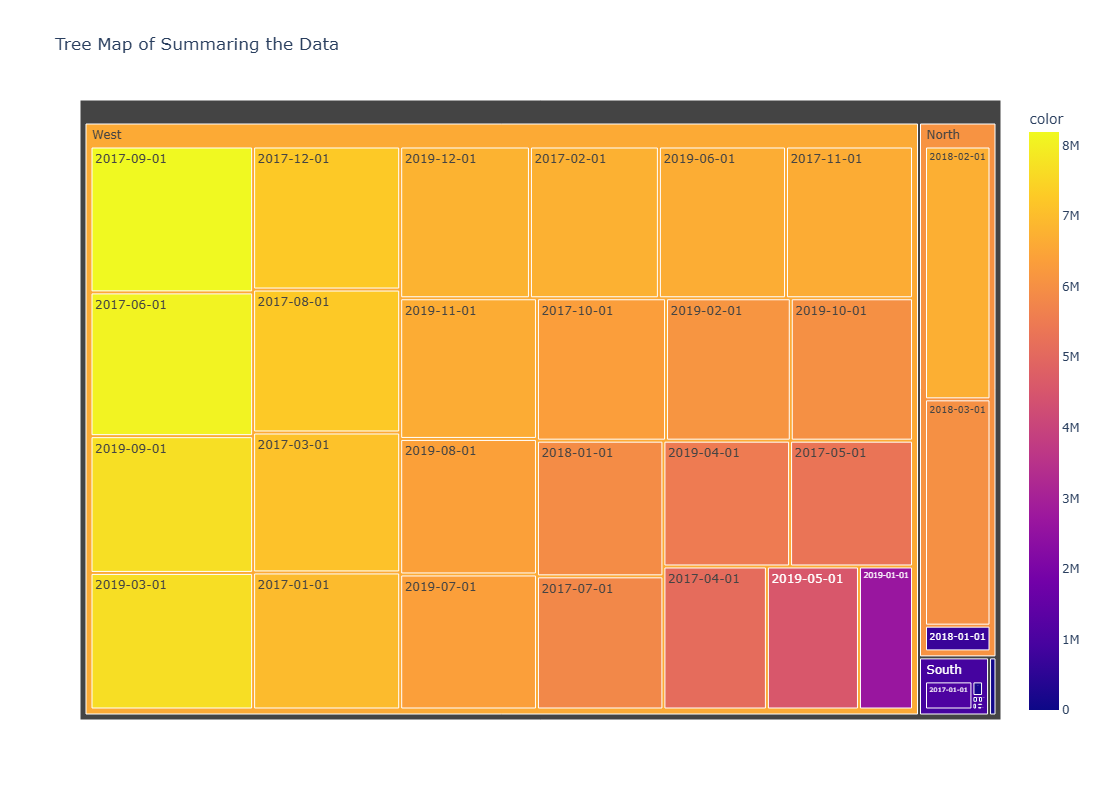

In [1039]:
px.treemap(data_frame=region_agg_1,path=['Region','Short Date'],values='Sales Amount',color=region_agg_1['Sales Amount'],height=800,width=1000,title='Tree Map of Summaring the Data')

## Tree Map Graph in West Region

In [1043]:
west_region.head(2)

CustKey Short Date                       Item Region  Sales Rep  \
567  10002155 2017-01-01           Landslide Pepper   West        127   
568  10002969 2017-01-01  Best Choice Fudge Cookies   West        175   

    Promised Delivery Date  List Price  Sales Quantity  \
567             2017-01-05      195.61               2   
568             2017-01-05     1035.40               3   

     Sales Amount Based on List Price  Sales Price  Sales Amount  \
567                            391.22       103.28        206.56   
568                           3106.20       572.53       1717.60   

     Discount Amount  Discount in %  Sales Cost Amount  Sales Margin Amount  \
567           184.66           47.2              97.46               109.10   
568          1388.60           44.7            1018.42               699.18   

       TAT  
567 0 days  
568 0 days

In [1045]:
west_item_agg = west_region.groupby(by="Item").agg({'Sales Quantity':'sum','Sales Price':'mean','Sales Amount':'sum','Sales Cost Amount':'sum','Sales Margin Amount':'sum','Discount in %':'mean'}).reset_index()

In [1047]:
west_item_agg.insert(loc=6,column='Margin in %',value=west_item_agg['Sales Margin Amount']/west_item_agg['Sales Amount']*100)

In [1049]:
west_item_agg['Sales Price'] = west_item_agg['Sales Price'].round(2)

In [1051]:
west_item_agg['Margin in %'] = west_item_agg['Margin in %'].round(2)

In [1053]:
west_item_agg['Discount in %'] = west_item_agg['Discount in %'].round(2)

In [1055]:
west_item_agg.head(2)

Item  Sales Quantity  Sales Price  Sales Amount  \
0      American Beef Bologna             200        11.78       2357.30   
1  American Chicken Hot Dogs             113       105.23      11858.89   

   Sales Cost Amount  Sales Margin Amount  Margin in %  Discount in %  
0            1643.60               713.70        30.28          53.16  
1            3885.85              7973.04        67.23          47.12

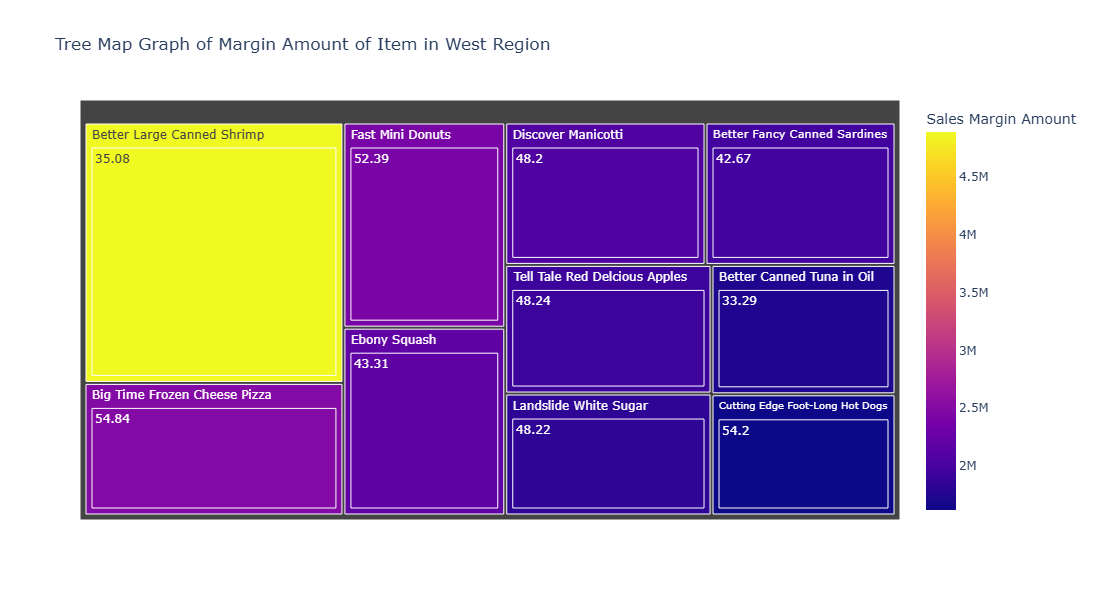

In [1064]:
px.treemap(data_frame=west_item_agg.sort_values(by='Sales Margin Amount',ascending=False).head(10),path=['Item','Margin in %'],values='Sales Margin Amount',color='Sales Margin Amount',height=600,width=1000,title='Tree Map Graph of Margin Amount of Item in West Region')

## North Region Sales Data Analysis

In [1066]:
north_region = amazon_6[amazon_6['Region'] == 'North']

In [1070]:
north_region.head(2)

CustKey Invoice Date  Invoice Year Short Date Item Number  \
60659  10019066   2018-01-29          2018 2018-01-01       32966   
60660  10019066   2018-01-29          2018 2018-01-01       26370   

                                  Item Region  Sales Rep  Line Number  \
60659  High Top Golden Delcious Apples  North        108        16000   
60660             Bravo Canned Tomatos  North        108         9000   

      Promised Delivery Date  Delivery Year  List Price  Sales Quantity  \
60659             2018-01-29           2018      147.15               6   
60660             2018-01-29           2018      205.26               2   

       Sales Amount Based on List Price  Sales Price  Sales Amount  \
60659                            882.90        82.94        497.61   
60660                            410.52       115.69        231.38   

       Discount Amount  Sales Cost Amount  Sales Margin Amount    TAT  
60659           385.29             340.73               156.88 0 days  
60660           179.14             115.07               116.31 0 days

In [1072]:
north_item_agg = north_region.groupby(by='Item').agg({'Sales Quantity':'sum','Sales Price':'mean','Sales Amount':'sum','Sales Cost Amount':'sum','Sales Margin Amount':'sum'}).reset_index()

In [1074]:
north_item_agg.insert(loc=6,column='Margin in %',value=north_item_agg['Sales Margin Amount']/north_item_agg['Sales Amount']*100)

In [1076]:
north_item_agg['Sales Price'] = north_item_agg['Sales Price'].round(2)

In [1078]:
north_item_agg['Margin in %'] = north_item_agg['Margin in %'].round(2)

In [1080]:
north_item_agg.head(3)

Item  Sales Quantity  Sales Price  Sales Amount  \
0      American Beef Bologna              30        12.43        372.88   
1  American Chicken Hot Dogs              20       110.89       2218.62   
2       American Corned Beef             171       234.70      40044.53   

   Sales Cost Amount  Sales Margin Amount  Margin in %  
0             246.54               126.34        33.88  
1             687.75              1530.87        69.00  
2           22211.37             17833.16        44.53

In [1082]:
north_item_agg.sort_values(by='Sales Amount',ascending=False).head()

Item  Sales Quantity  Sales Price  Sales Amount  \
54     Better Large Canned Shrimp           55273        46.26    1506826.49   
140            Discover Manicotti             842       709.87     598501.78   
353          Moms Turkey Hot Dogs            2998       199.55     565340.10   
60   Big Time Frozen Cheese Pizza            2769       211.03     525498.22   
50      Better Canned Tuna in Oil           22660        22.23     503703.20   

     Sales Cost Amount  Sales Margin Amount  Margin in %  
54           939252.96            567573.53        37.67  
140          292241.90            306259.88        51.17  
353          291763.96            273576.14        48.39  
60           233243.92            292254.30        55.61  
50           327851.67            175851.53        34.91

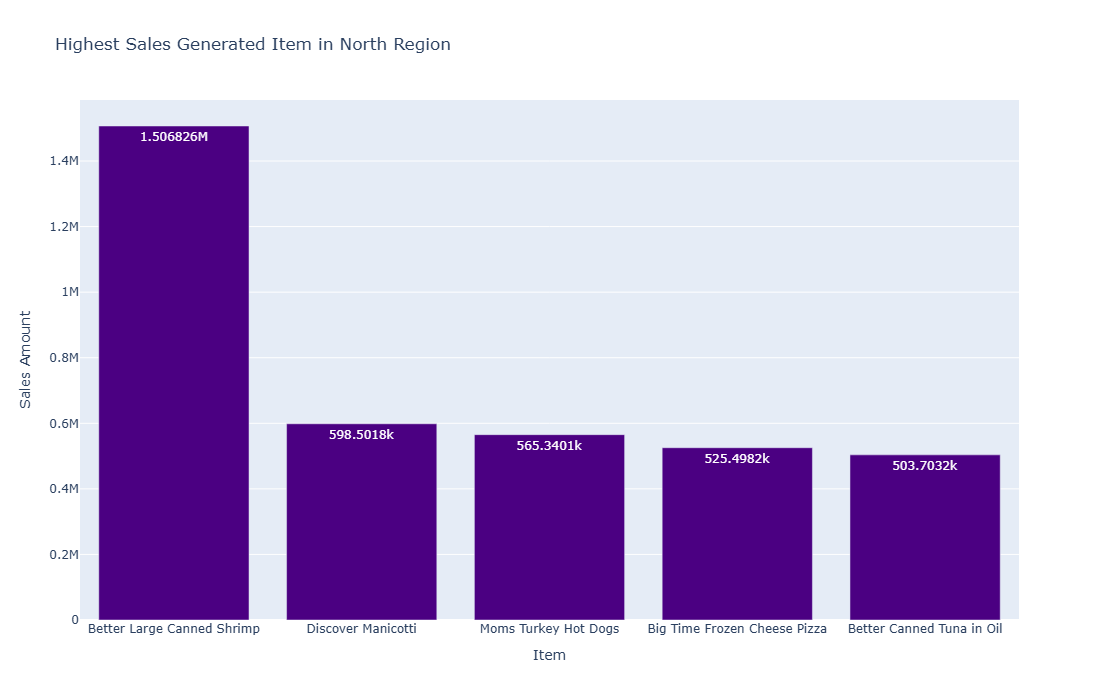

In [1090]:
px.bar(data_frame=north_item_agg.sort_values(by='Sales Amount',ascending=False).head(),x='Item',y='Sales Amount',text_auto=True,height=700,width=1000,color_discrete_sequence=['indigo'],title='Highest Sales Generated Item in North Region')

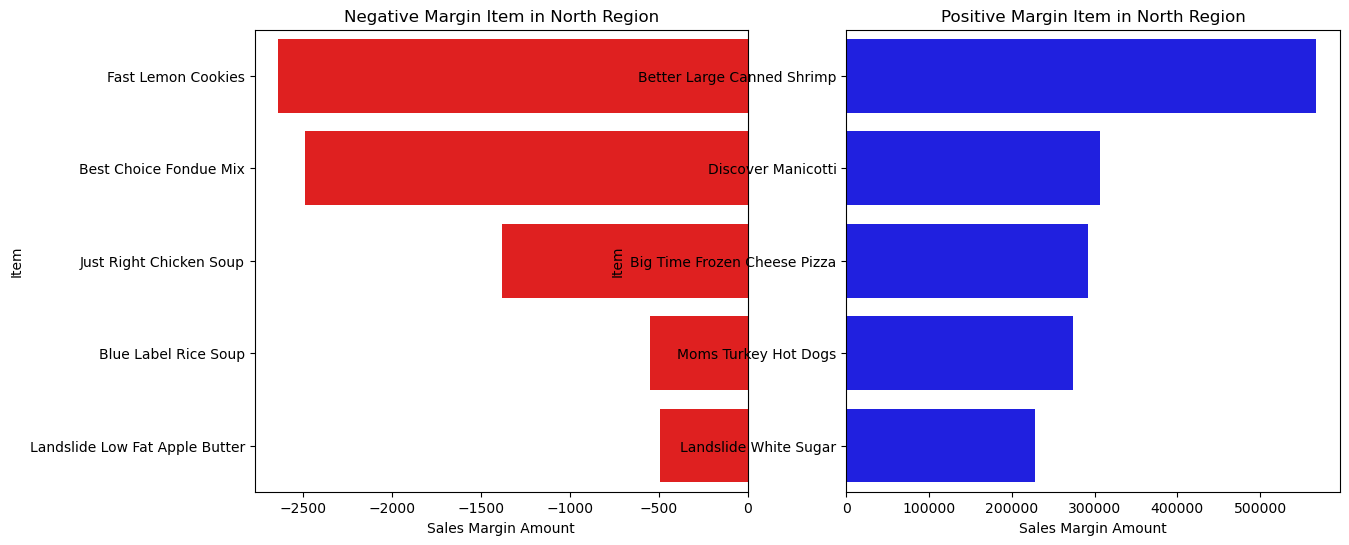

In [1094]:
plt.figure(figsize=(14,6))
plt.subplot(1,2,1)
sns.barplot(data=north_item_agg.sort_values(by='Sales Margin Amount',ascending=True).head(),x='Sales Margin Amount',y='Item',color='red')
plt.title('Negative Margin Item in North Region')
plt.subplot(1,2,2)
sns.barplot(data=north_item_agg.sort_values(by='Sales Margin Amount',ascending=False).head(),x='Sales Margin Amount',y='Item',color='blue')
plt.title('Positive Margin Item in North Region')
plt.show()

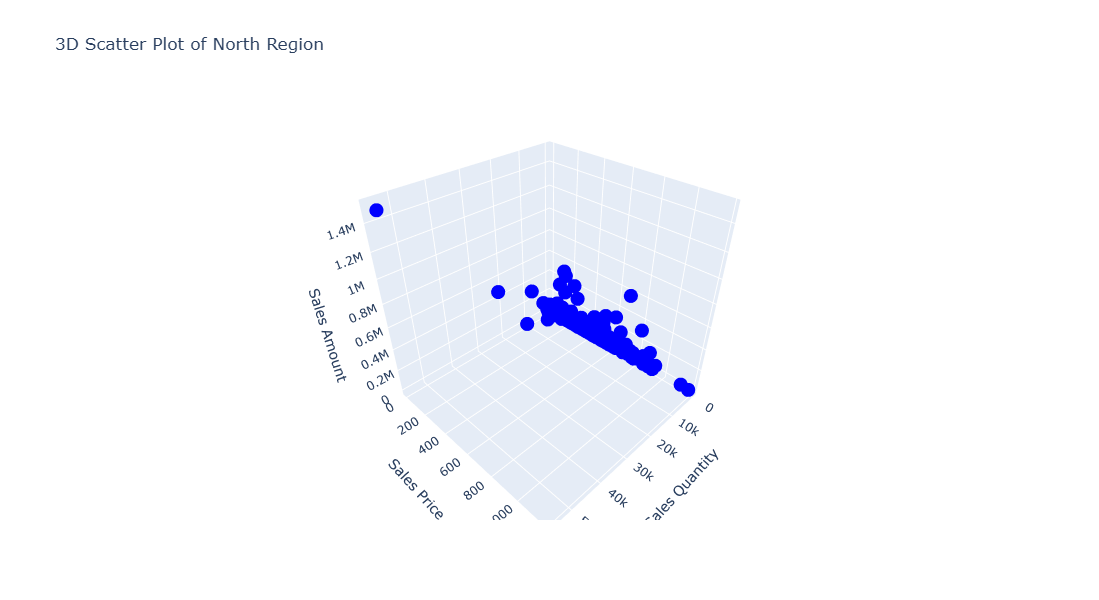

In [1100]:
px.scatter_3d(data_frame=north_item_agg,x='Sales Quantity',y='Sales Price',z='Sales Amount',height=600,width=1000,color_discrete_sequence=['Blue','orange'],title='3D Scatter Plot of North Region')

## Tree Map in North Region

In [1102]:
north_item_agg = north_region.groupby(by=['Short Date','Item']).agg({'Sales Quantity':'sum','Sales Price':'mean','Sales Amount':'sum','Sales Cost Amount':'sum','Sales Margin Amount':'sum'}).reset_index()

In [1104]:
north_item_agg.head(2)

Short Date                   Item  Sales Quantity  Sales Price  \
0 2018-01-01  American Beef Bologna              30        12.43   
1 2018-01-01  American Potato Salad               2       250.78   

   Sales Amount  Sales Cost Amount  Sales Margin Amount  
0        372.88             246.54               126.34  
1        501.56             411.44                90.12

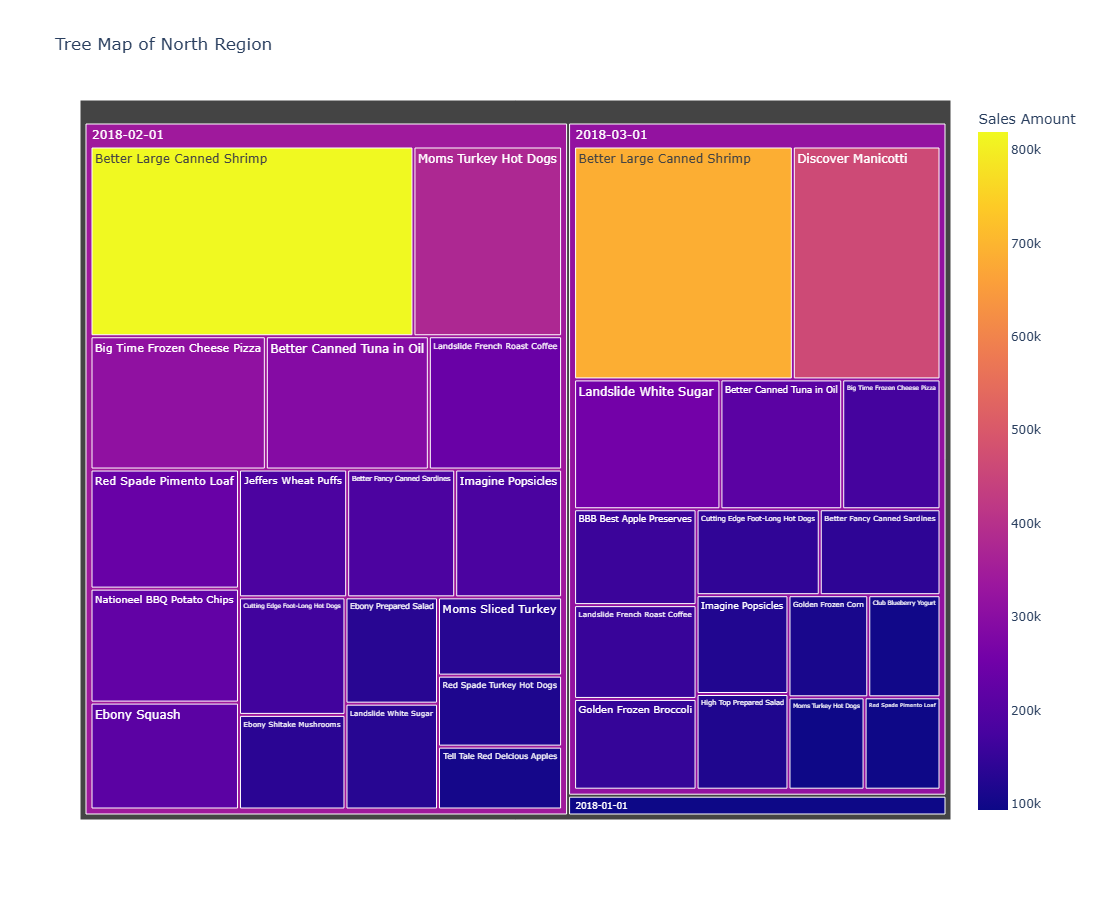

In [1108]:
px.treemap(data_frame=north_item_agg.sort_values(by='Sales Amount',ascending=False).head(35),path=['Short Date','Item'],values='Sales Amount',color='Sales Amount',height=900,width=1000,title='Tree Map of North Region')

## Clustering

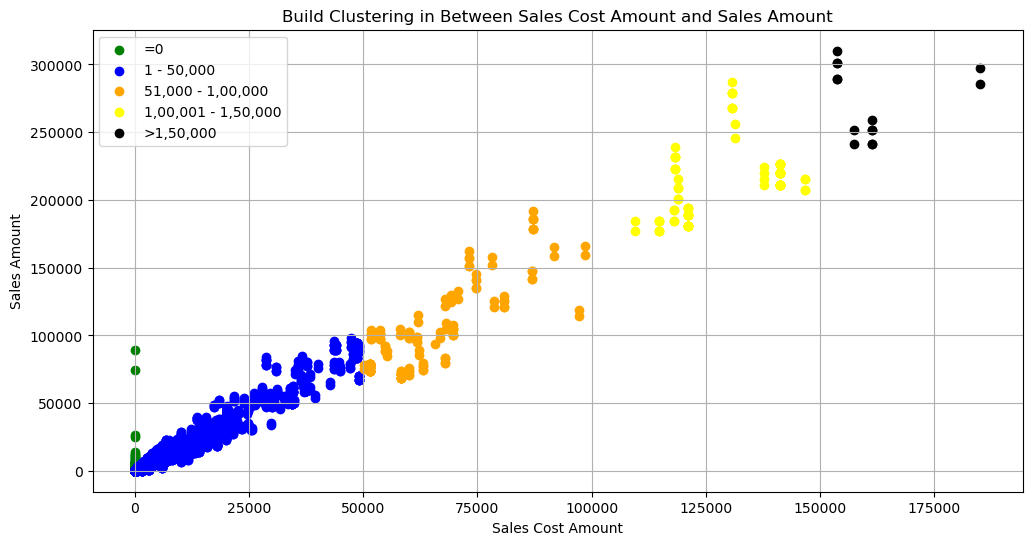

In [1110]:
plt.figure(figsize=(12,6))
plt.xlabel('Sales Cost Amount')
plt.ylabel('Sales Amount')
plt.scatter(data=amazon_6[amazon_6['Sales Cost Amount'] == 0],x='Sales Cost Amount',y='Sales Amount',color='green',label='=0')
plt.scatter(data=amazon_6[(amazon_6['Sales Cost Amount'] > 0) & (amazon_6['Sales Cost Amount'] <= 50000)],x='Sales Cost Amount',y='Sales Amount',c='blue',label='1 - 50,000')
plt.scatter(data=amazon_6[(amazon_6['Sales Cost Amount'] > 50000) & (amazon_6['Sales Cost Amount'] <= 100000)],x='Sales Cost Amount',y='Sales Amount',c='orange',label='51,000 - 1,00,000')
plt.scatter(data=amazon_6[(amazon_6['Sales Cost Amount'] > 100000) & (amazon_6['Sales Cost Amount'] <= 150000)],x='Sales Cost Amount',y='Sales Amount',c='yellow',label='1,00,001 - 1,50,000')
plt.scatter(data=amazon_6[amazon_6['Sales Cost Amount'] > 150000],x='Sales Cost Amount',y='Sales Amount',c='black',label='>1,50,000')
plt.title('Build Clustering in Between Sales Cost Amount and Sales Amount')
plt.grid()
plt.legend()
plt.show()

# Machine Learning

## amazon_pred Data Frame

In [1114]:
amazon_pred = amazon_6[['Item','Region','List Price','Sales Quantity','Sales Amount Based on List Price','Sales Price','Sales Amount','Discount Amount','Sales Cost Amount','Sales Margin Amount']]

## Data Aggregating

In [1116]:
amazon_pred.insert(loc=10,column='Margin in %',value=amazon_pred['Sales Margin Amount']/amazon_pred['Sales Amount']*100)

In [1118]:
amazon_pred['Margin in %'] = amazon_pred['Margin in %'].round(2)

In [1120]:
amazon_pred.insert(loc=6,column='Actual Price in %',value=amazon_pred['Sales Price']/amazon_pred['List Price']*100)

In [1122]:
amazon_pred['Actual Price in %'] = amazon_pred['Actual Price in %'].round(2)

In [1124]:
amazon_pred.insert(loc=9,column='Discount Per Qty',value=amazon_pred['Discount Amount']/amazon_pred['Sales Quantity'])

In [1126]:
amazon_pred['Discount Per Qty'] = amazon_pred['Discount Per Qty'].round(2)

In [1128]:
amazon_pred.insert(loc=10,column='Discount in %',value=amazon_pred['Discount Per Qty']/amazon_pred['List Price']*100)

In [1130]:
amazon_pred['Discount in %'] = amazon_pred['Discount in %'].round(2)

## Data Cleaning

In [1132]:
amazon_pred.drop(columns='Discount Amount',inplace=True)

In [1134]:
amazon_pred.drop(columns='Sales Amount Based on List Price',inplace=True)

## amazon_pred_2 Data Frame

In [1136]:
amazon_pred_2 = amazon_pred[['Item','Region','List Price','Discount in %','Discount Per Qty','Sales Price','Sales Quantity','Sales Amount','Sales Cost Amount','Sales Margin Amount','Margin in %']]

In [1138]:
amazon_pred_2.head(3)

Item Region  List Price  Discount in %  \
1               Moms Sliced Turkey  East       824.96          44.70   
2  Cutting Edge Foot-Long Hot Dogs  East       548.66          20.00   
4             High Top Sweet Onion  East       408.52          51.99   

   Discount Per Qty  Sales Price  Sales Quantity  Sales Amount  \
1            368.79       456.17               1        456.17   
2            109.73       438.93               1        438.93   
4            212.37       196.15             455      89248.66   

   Sales Cost Amount  Sales Margin Amount  Margin in %  
1                0.0               456.17        100.0  
2                0.0               438.93        100.0  
4                0.0             89248.66        100.0

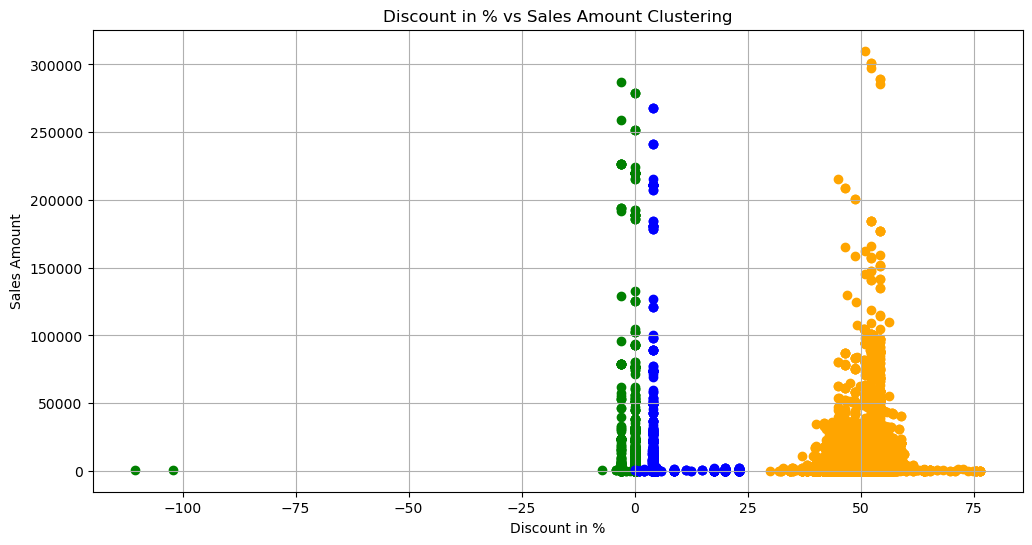

In [1140]:
plt.figure(figsize=(12,6))
plt.xlabel('Discount in %')
plt.ylabel('Sales Amount')
plt.scatter(data=amazon_pred_2[amazon_pred_2['Discount in %'] <= 0],x='Discount in %',y='Sales Amount',c='green')
plt.scatter(data=amazon_pred_2[(amazon_pred_2['Discount in %'] > 0) & (amazon_pred_2['Discount in %'] < 25)],x='Discount in %',y='Sales Amount',c='blue')
plt.scatter(data=amazon_pred_2[amazon_pred_2['Discount in %'] > 25],x='Discount in %',y='Sales Amount',c='orange')
plt.grid()
plt.title('Discount in % vs Sales Amount Clustering')
plt.show()

## loss_item Data Frame (Where the Margin is Negative)

In [1142]:
loss_item = amazon_pred_2[amazon_pred_2['Sales Cost Amount'] > amazon_pred_2['Sales Amount']]

In [1144]:
loss_item.head()

Item Region  List Price  Discount in %  Discount Per Qty  \
254  Good Chablis Wine  South       18.83          -0.00             -0.00   
358     Landslide Salt  South      229.00          47.47            108.70   
549     Landslide Salt  South      229.00          46.37            106.18   
555     Landslide Salt  South      229.00          47.47            108.70   
603     Landslide Salt   West      229.00          47.47            108.70   

     Sales Price  Sales Quantity  Sales Amount  Sales Cost Amount  \
254        18.83             168       3163.41            3422.87   
358       120.30               2        240.60             294.84   
549       122.82               2        245.65             294.84   
555       120.30               2        240.60             294.84   
603       120.30               2        240.60             294.84   

     Sales Margin Amount  Margin in %  
254              -259.46        -8.20  
358               -54.24       -22.54  
549               -49.19       -20.02  
555               -54.24       -22.54  
603               -54.24       -22.54

## loss_item_agg Data Frame

In [1146]:
loss_item_agg = loss_item.groupby(by='Item').agg({'List Price':'mean','Discount Per Qty':'mean','Sales Price':'mean','Sales Quantity':'mean','Sales Amount':'mean','Sales Cost Amount':'mean','Sales Margin Amount':'mean','Margin in %':'mean'}).reset_index()

In [1148]:
loss_item_agg['List Price'] = loss_item_agg['List Price'].round(2)

In [1150]:
loss_item_agg['Discount Per Qty'] = loss_item_agg['Discount Per Qty'].round(2)

In [1152]:
loss_item_agg['Sales Price'] = loss_item_agg['Sales Price'].round(2)

In [1154]:
loss_item_agg['Sales Quantity'] = loss_item_agg['Sales Quantity'].round(0)

In [1156]:
loss_item_agg['Sales Amount'] = loss_item_agg['Sales Amount'].round(2)

In [1158]:
loss_item_agg['Sales Cost Amount'] = loss_item_agg['Sales Cost Amount'].round(2)

In [1160]:
loss_item_agg['Sales Margin Amount'] = loss_item_agg['Sales Margin Amount'].round(2)

In [1162]:
loss_item_agg['Margin in %'] = loss_item_agg['Margin in %'].round(2)

In [1164]:
loss_item_agg.head()

Item  List Price  Discount Per Qty  Sales Price  \
0       Atomic Spicy Mints      325.19            164.63       160.56   
1   Best Choice Fondue Mix        3.50              0.06         3.44   
2  Blue Label Canned Beets      634.11            366.26       267.85   
3     Blue Label Rice Soup       51.50              0.51        50.99   
4          Carlson 1% Milk      928.15            455.31       472.84   

   Sales Quantity  Sales Amount  Sales Cost Amount  Sales Margin Amount  \
0             4.0        696.17             711.08               -14.91   
1           127.0        439.41            2164.52             -1725.12   
2             1.0        267.85             272.06                -4.21   
3            25.0       1274.63            1875.00              -600.37   
4             1.0        472.84             497.84               -25.00   

   Margin in %  
0        -2.22  
1      -392.15  
2        -1.57  
3       -47.21  
4        -5.33

## Loss Item Analysis

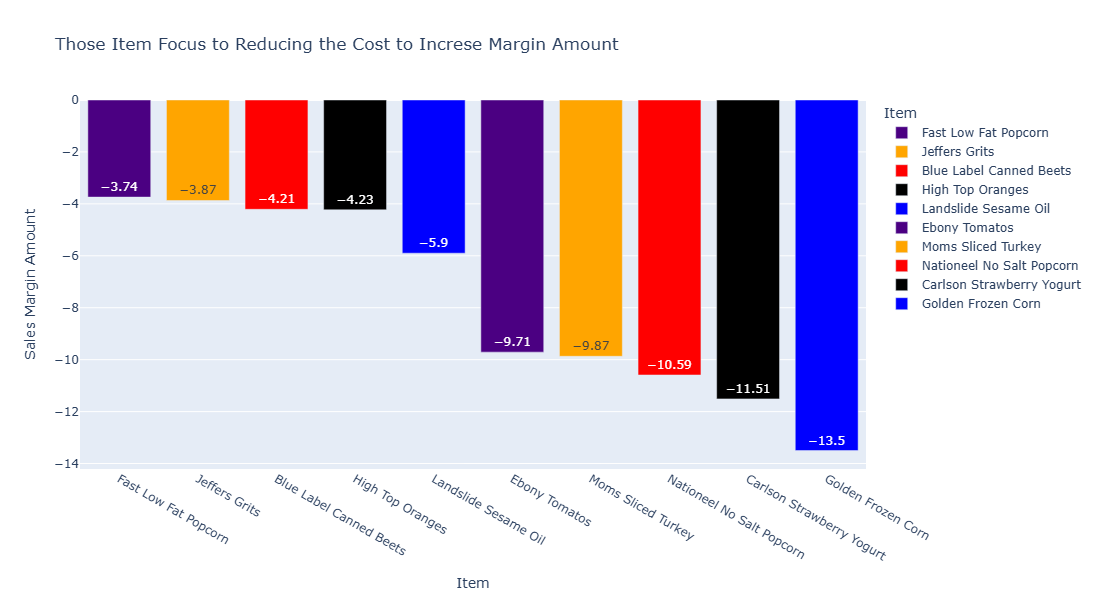

In [1166]:
px.bar(data_frame=loss_item_agg.sort_values(by='Sales Margin Amount',ascending=False).head(10),x='Item',y='Sales Margin Amount',color='Item',color_discrete_sequence=['Indigo','orange','red','black','blue'],height=600,width=1000,text_auto=True,title='Those Item Focus to Reducing the Cost to Increse Margin Amount')

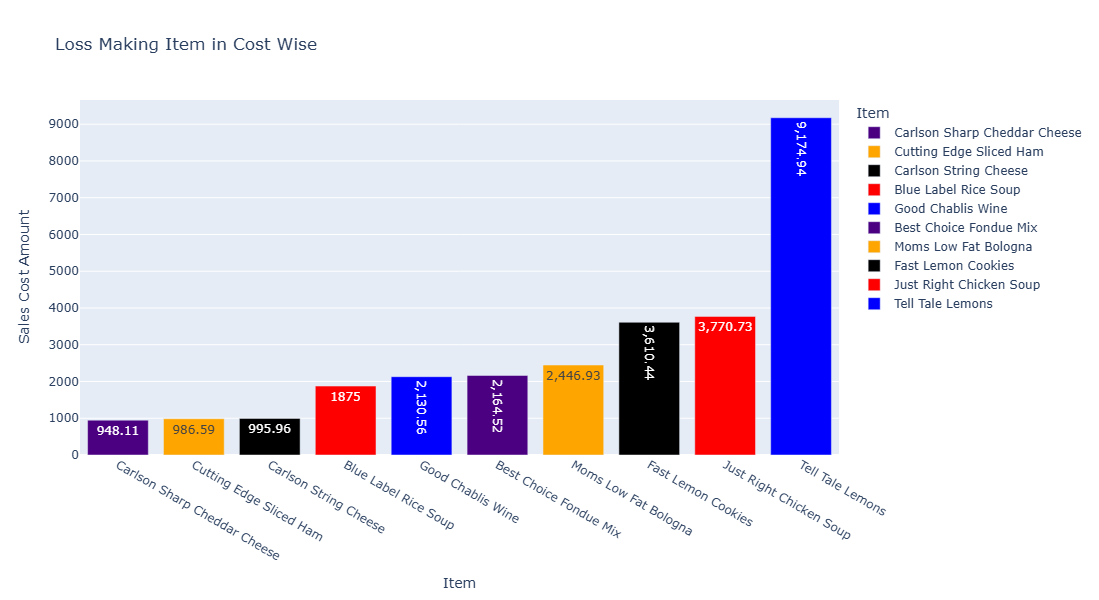

In [1168]:
px.bar(data_frame=loss_item_agg.sort_values(by='Sales Cost Amount',ascending=True).tail(10),x='Item',y='Sales Cost Amount',color='Item',color_discrete_sequence=['indigo','orange','black','red','blue'],height=600,width=1000,text_auto=True,title='Loss Making Item in Cost Wise')

# Machine Learning Model (Sales Margin Amount Prediction)

In [1170]:
amazon_pred_3 = amazon_pred_2.copy()

In [1172]:
amazon_pred_3.head()

Item Region  List Price  Discount in %  \
1               Moms Sliced Turkey  East       824.96          44.70   
2  Cutting Edge Foot-Long Hot Dogs  East       548.66          20.00   
4             High Top Sweet Onion  East       408.52          51.99   
6               Moms Sliced Turkey  East       795.31          46.65   
7                 Tell Tale Garlic  East       575.00          52.88   

   Discount Per Qty  Sales Price  Sales Quantity  Sales Amount  \
1            368.79       456.17               1        456.17   
2            109.73       438.93               1        438.93   
4            212.37       196.15             455      89248.66   
6            371.01       424.30               1        424.30   
7            304.04       270.96               2        541.92   

   Sales Cost Amount  Sales Margin Amount  Margin in %  
1                0.0               456.17        100.0  
2                0.0               438.93        100.0  
4                0.0             89248.66        100.0  
6                0.0               424.30        100.0  
7                0.0               541.92        100.0

## Data Preprocessing and Label Encoding

In [1174]:
from sklearn import preprocessing

In [1176]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [1178]:
amazon_pred_3['Item'] = le.fit_transform(amazon_pred_3['Item'])

In [1180]:
amazon_pred_3['Region'] = le.fit_transform(amazon_pred_3['Region'])

## Defined Features (x) and Target (y) Variables

In [1184]:
x = amazon_pred_3[['Item','Region','List Price','Sales Price','Sales Quantity','Sales Cost Amount']]

In [1186]:
y = amazon_pred_3['Sales Margin Amount']

## Train-Test and Split the Model

In [1188]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x,y,train_size=0.8,random_state=9853)

## Import Linear Regression Model

In [1190]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()

## Train and Fit the Model

In [1192]:
lr.fit(x_train,y_train)

LinearRegression()

#### Intercept

In [1194]:
lr.intercept_

486.30119954148404

#### Coef

In [1196]:
lr.coef_

array([-3.41997159e-02, -1.11631168e+02, -8.75462281e-01,  1.33288564e+00,
       -3.46464601e+00,  7.73422357e-01])

## Model Predict

In [1198]:
y_pred = lr.predict(x_test)

In [1200]:
y_pred.round(2)

array([ 301.47,  171.54, 3165.64, ...,  219.55,  403.05,  402.41])

## Model Evaluation And Accuracy

In [1202]:
from sklearn.metrics import mean_absolute_error,mean_absolute_percentage_error,mean_squared_error,confusion_matrix

In [1204]:
mean_absolute_error(y_test,y_pred)

433.0925080459326

In [1206]:
mean_squared_error(y_test,y_pred)

2640042.722160584

In [1208]:
mean_absolute_percentage_error(y_pred,y_test).round(3)

0.617

## Data Export for Dashboard Building

In [ ]:
amazon_6.to_excel('Amazon_Data.xlsx',index=False)